# Obrabianie danych

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")
#sns.set(rc = {'figure.figsize':(30,8)})
#pd.set_option('display.float_format', '{:.2%}'.format)

In [2]:
data_frame = pd.read_excel("Desktop/Inżynierka - ankieta (Odpowiedzi).xlsx")

In [3]:
data_frame = data_frame.drop('Sygnatura czasowa', axis=1)

polish_letters_to_english = str.maketrans('ęóąśłżźćń', 'eoaslzzcn')
numbers_to_questions = {}
number = 0

for col in data_frame.columns:
    if isinstance(data_frame[col].values[0], str):
        data_frame[col] = data_frame[col].str.lower()  #wszystko do lowercase
        data_frame[col] = data_frame[col].str.translate(polish_letters_to_english)  #zamiana polskich znakow
        data_frame[col] = data_frame[col].str.strip()  #usuniecie spacji
    numbers_to_questions[number] = col
    data_frame.rename(columns = {col:number}, inplace = True)  #numery zamiast pytan
    number += 1
    
data_frame

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,student,7+,joliot-curie,lukasz piwowar,bulwar pwr,rektor,indywidualne studia informatyczno matematyczne,wydzialy,7,syk - systemy komputerowe,...,alpaki,3,jurdzinski,dyrektor do spraw dydaktycznych,2008-2010,[*] przemyslaw wiesci-wiszewski na zawsze w na...,grunwaldzki,8,pracownia grafiki komputerowej,whitebook
1,student,7+,joliota-curie 14,lukasz piwowar,orzed instytut,rektor,indywidualne studia informatyczno matematyczne,zaklady,6,sk,...,alpaki,4,nie wiem,nie wiem,2004-2006,nie wiem,grunwaldzki,8,pracownia grafiki komputerowej,whitebook
2,student,7+,jliot curie 25,lukasz piwowar,beachbar na bulwarze pwr,rektor,indywidualny system nauczania informatyki i ma...,zaklady,7,sk,...,alpaki,3,jan otol,prodziekan,2000-2002,nie wiem,grunwaldzki,10,pracownia metod numerycznych,whitebook
3,student,7+,nie wiem,lukasz piwowar,wyspa,rektor,indywidualne studia informatyczno-matematyczne,zaklady,7,syk,...,alpaki,4,nie wiem,prodziekan,2004-2006,nie wiem,grunwaldzki,9,pracownia grafiki komputerowej,whitebook
4,student,7+,joliot curie 14,lukasz piwowar,wyspa,rektor,indywidualne studia informatyczno matematyczne,zaklady,7,syk,...,alpaki,4,jurczynski,prodziekan,2004-2006,nie wiem,grunwaldzki,8,pracownia grafiki komputerowej,whitebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,student,1-2,nie wiem,wiktor zychla,wyspa slodowa,rektor,indywidualne studia informatycze i matematyczne,katedry,8,ask,...,alpaki,3,tomasz jurdzinski,nie wiem,2012-2014,nie wiem,grunwaldzki,9,pracownia metod numerycznych,nie wiem
96,student,5-6,curie sklodowskiej,lukasz piwowar,wyspa slodowa!,dziekan,indywidualne studia informatyczno matematyczne,wydzialy,6,systemy komputetowe,...,alpaki,4,nie wiem,nie wiem,2000-2002,nie wiem,grunwaldzki,7,pracownia zlozonosci obliczeniowej i algorytmow,nie wiem
97,student,3-4,fryderyka joliot curie,lukasz piwowar,wyspa,rektor,indywidualne studia informatyczno matematyczne,zaklady,7,systemy komputerowe,...,alpaki,3,nie wiem,nie wiem,2008-2010,nie wiem,grunwaldzki,9,pracownia zlozonosci obliczeniowej i algorytmow,whitebook
98,student,1-2,fryderyka joliot curie,wiktor zychla,wyspa slodowa,rektor,indywidualne studia informatyczno matematyczne,zaklady,7,systemy komputerowe,...,alpaki,4,nie wiem,nie wiem,2004-2006,nie wiem,grunwaldzki,8,pracownia zlozonosci obliczeniowej i algorytmow,whitebook


In [4]:
df = data_frame.copy()
df_plot = df.copy()

In [5]:
numbers_to_questions

{0: 'Jesteś studentem czy pracownikiem Instytutu Informatyki?',
 1: 'Ile ukończyłaś/ukończyłeś semestrów?',
 2: 'Jaki adres ma Instytut Informatyki (nazwa ulicy i numer)?',
 3: 'Kto prowadzi przedmiot, na którym nauczysz się tworzyć modele w SketchUpie?',
 4: 'Jakie jest najpopularniejsze miejsce we Wrocławiu, gdzie możesz legalnie napić się piwa na świeżym powietrzu?',
 5: 'Kto jest najwyżej w hierarchii władzy uczelnianej?',
 6: 'Jaka jest pełna nazwa skrótowca ISIM?',
 7: 'Na co dzieli się administracyjnie Instytut Informatyki?',
 8: 'Ile przedmiotów obowiązkowych jest na I stopniu studiów (licencjat/inżynier)?',
 9: 'Jakim jednym przedmiotem można zaliczyć efekty kształcenia SO (systemy operacyjne) i ASK (architektura systemów komputerowych)?',
 10: 'Jak nazywa się coroczny, zimowy obóz organizowany przez studentów Instytutu Informatyki?',
 11: 'Gdy student zadeklaruje zadanie, którego nie zrobił, to może dostać za nie dużego…',
 12: 'W jakiej zakładce w USOS sprawdzisz swoje oceny

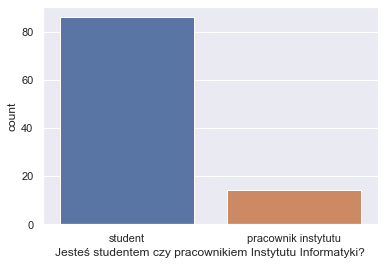

In [6]:
plot = sns.countplot(x=0, data=df)
plot.set_xlabel(numbers_to_questions[0])

student_count = df[0].value_counts()[0]
pracownik_count = df[0].value_counts()[1]

0        1  
student  7+     31.395349
         1-2    25.581395
         3-4    25.581395
         5-6    17.441860
Name: 1, dtype: float64


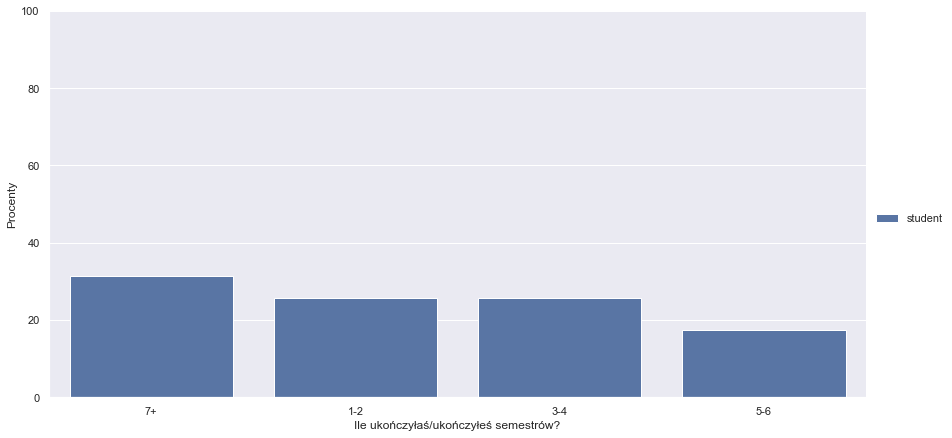

In [7]:
x = 1
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [8]:
keywords = ['joliot', 'curie', '15']
keywords_without_number = ['joliot', 'curie']
number = '15'

for row in df[2]:
    if all(keyword in row for keyword in keywords):
        df[2] = df[2].replace(row, 'joliot-curie 15')
        df_plot[2] = df_plot[2].replace(row, 'joliot-curie 15')
    elif all(keyword in row for keyword in keywords_without_number) and number not in row:
        df[2] = df[2].replace(row, 'joliot-curie')
        df_plot[2] = df_plot[2].replace(row, 'joliot-curie')
    else:
        df_plot[2] = df_plot[2].replace(row, 'nie wiem/inne')
        
        
df[2].value_counts()

joliot-curie 15                       34
joliot-curie                          28
nie wiem                              27
pierra curie 3                         1
tego starego komucha 15                1
curie                                  1
wstretnego komucha juliot-curie 15     1
jolint curie 15                        1
curie 15                               1
curie sklodowskiej                     1
joilot curie 15                        1
juliot-curie ???                       1
joulie curie                           1
jliot curie 25                         1
Name: 2, dtype: int64

0                    2              
pracownik instytutu  joliot-curie 15    64.285714
                     nie wiem/inne      21.428571
                     joliot-curie       14.285714
student              nie wiem/inne      40.697674
                     joliot-curie       30.232558
                     joliot-curie 15    29.069767
Name: 2, dtype: float64


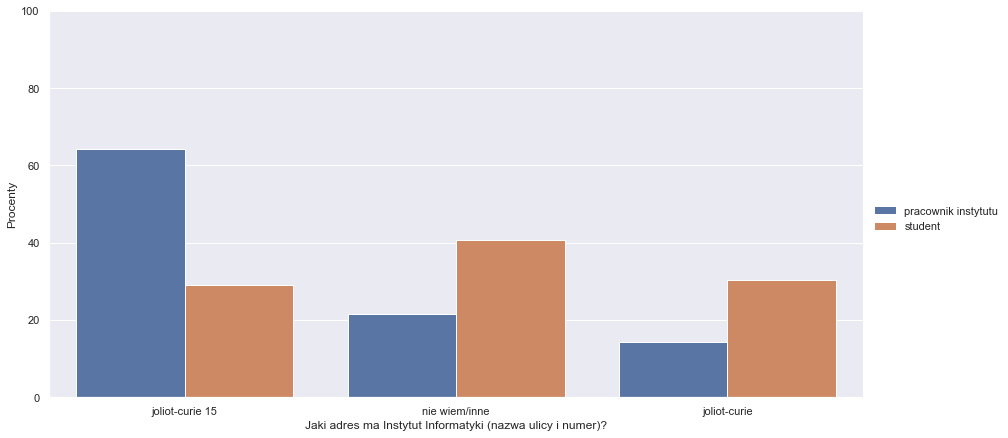

In [9]:
x = 2
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    3                
pracownik instytutu  lukasz piwowar       78.571429
                     marcin mlotkowski    14.285714
                     jakub kowalski        7.142857
student              lukasz piwowar       80.232558
                     wiktor zychla        10.465116
                     jakub kowalski        6.976744
                     marcin mlotkowski     2.325581
Name: 3, dtype: float64


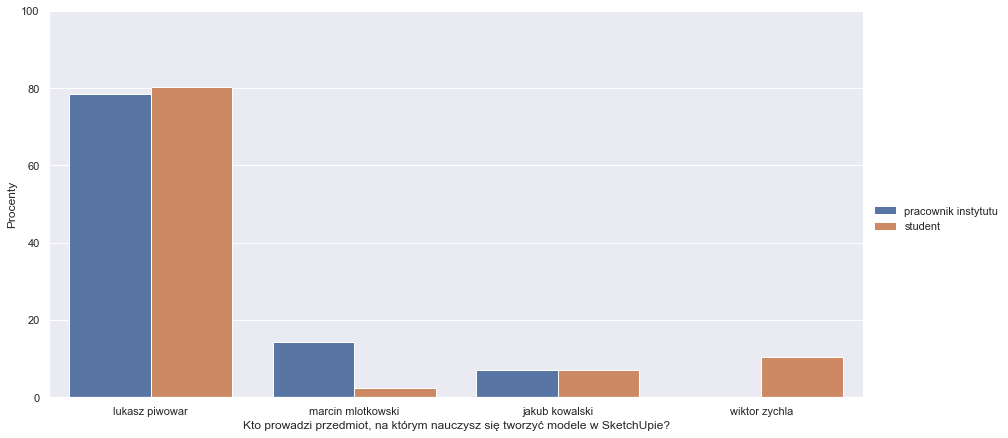

In [10]:
x = 3
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [11]:
keywords = ['wyspa', 'slodowa']

for row in df[4]:
    if any(keyword in row for keyword in keywords):
        df[4] = df[4].replace(row, 'wyspa slodowa')
        df_plot[4] = df_plot[4].replace(row, 'wyspa slodowa')
    else:
        df_plot[4] = df_plot[4].replace(row, 'nie wiem/inne')
        
df[4].value_counts()

wyspa slodowa                                                          88
nie wiem                                                                5
spiz                                                                    1
nad odra                                                                1
w poblizu wyspy piasek, ale nazwa tego obszaru wyleciala mi z glowy     1
beachbar na bulwarze pwr                                                1
rynek                                                                   1
orzed instytut                                                          1
bulwar pwr                                                              1
Name: 4, dtype: int64

0                    4            
pracownik instytutu  wyspa slodowa    57.142857
                     nie wiem/inne    42.857143
student              wyspa slodowa    93.023256
                     nie wiem/inne     6.976744
Name: 4, dtype: float64


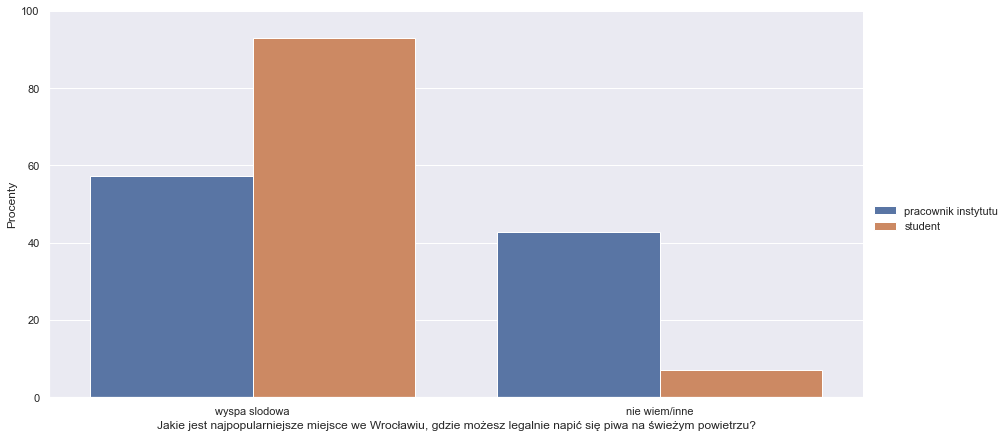

In [12]:
x = 4
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    5         
pracownik instytutu  rektor        92.857143
                     dziekan        7.142857
student              rektor        94.186047
                     dziekan        3.488372
                     dyrektor       1.162791
                     prodziekan     1.162791
Name: 5, dtype: float64


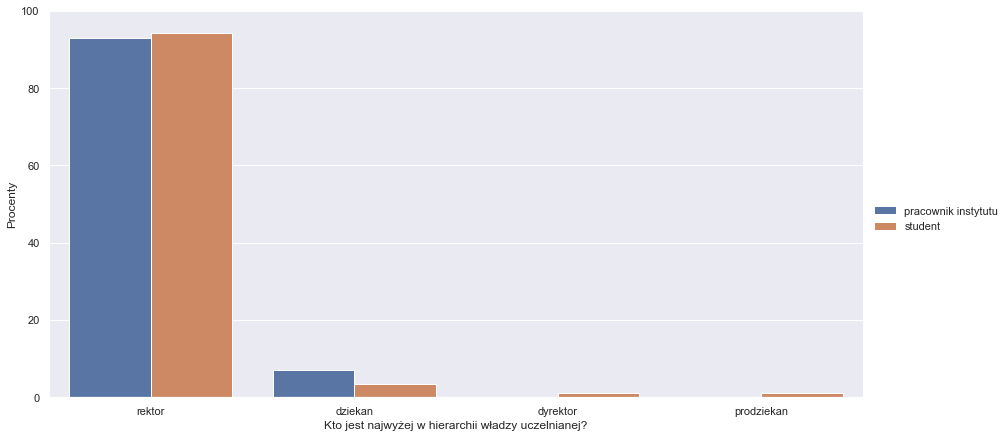

In [13]:
x = 5
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [14]:
keywords = ['indywidualne', 'studia', 'informatyczno', 'matematyczne']
keywords_incomplete_answer = ['indyw', 'studia', 'inf', 'mat']

for row in df[6]:
    if all(keyword in row for keyword in keywords):
        df[6] = df[6].replace(row, 'indywidualne studia informatyczno-matematyczne')
        df_plot[6] = df_plot[6].replace(row, 'indywidualne studia informatyczno-matematyczne')
    elif all(keyword in row for keyword in keywords_incomplete_answer):
        df[6] = df[6].replace(row, 'indywidualne studia inf-mat')  #literowki, skroty
        df_plot[6] = df_plot[6].replace(row, 'indywidualne studia inf-mat')
    else:
        df_plot[6] = df_plot[6].replace(row, 'nie wiem/inne')
        
df_plot[6].value_counts()

indywidualne studia informatyczno-matematyczne    76
indywidualne studia inf-mat                       13
nie wiem/inne                                     11
Name: 6, dtype: int64

0                    6                                             
pracownik instytutu  indywidualne studia informatyczno-matematyczne    64.285714
                     nie wiem/inne                                     28.571429
                     indywidualne studia inf-mat                        7.142857
student              indywidualne studia informatyczno-matematyczne    77.906977
                     indywidualne studia inf-mat                       13.953488
                     nie wiem/inne                                      8.139535
Name: 6, dtype: float64


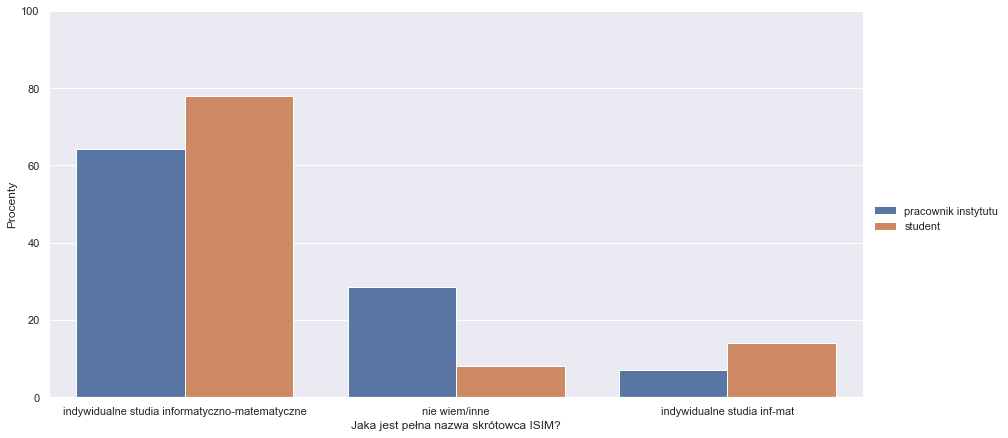

In [15]:
x = 6
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    7       
pracownik instytutu  zaklady     100.000000
student              zaklady      66.279070
                     wydzialy     17.441860
                     katedry       8.139535
                     zespoly       8.139535
Name: 7, dtype: float64


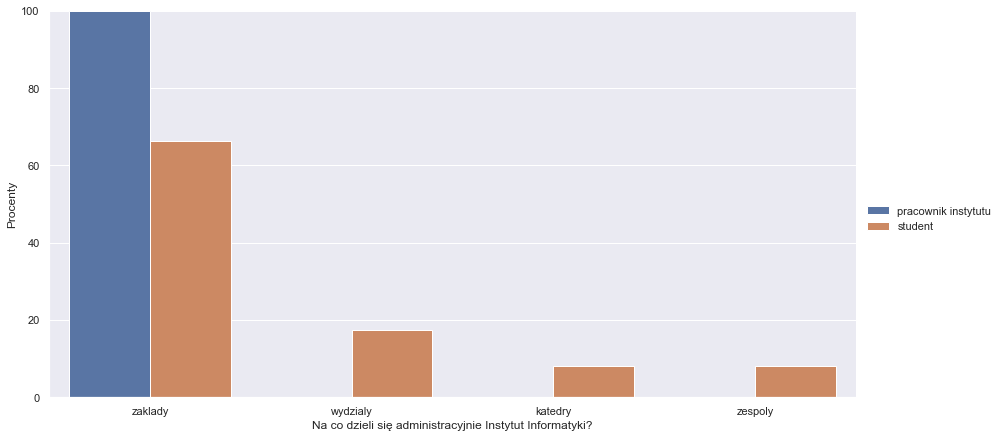

In [16]:
x = 7
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    8
pracownik instytutu  7    50.000000
                     6    35.714286
                     8     7.142857
                     9     7.142857
student              7    80.232558
                     6    10.465116
                     8     8.139535
                     9     1.162791
Name: 8, dtype: float64


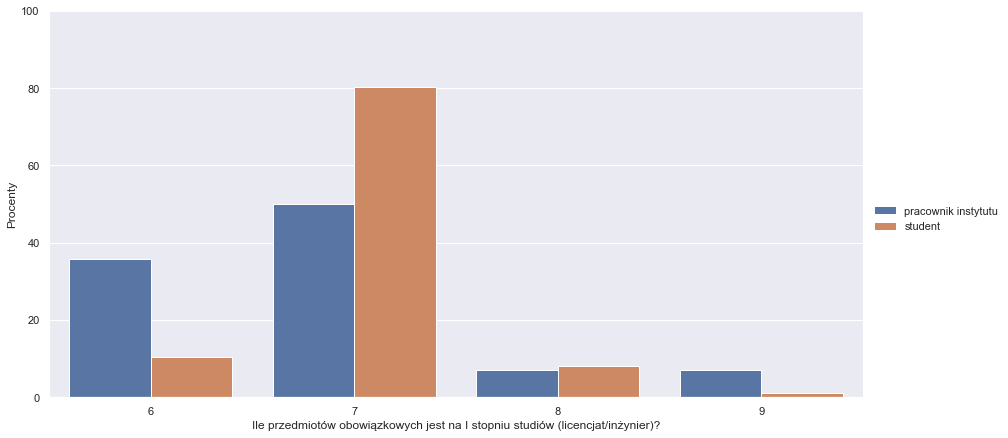

In [17]:
x = 8
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [18]:
keywords = ['syk', 'systemy komputerowe']

for row in df[9]:
    if any(keyword in row for keyword in keywords):
        df[9] = df[9].replace(row, 'syk (systemy komputerowe)')
        df_plot[9] = df_plot[9].replace(row, 'syk (systemy komputerowe)')
    else:
        df_plot[9] = df_plot[9].replace(row, 'nie wiem/inne')
        
df[9].value_counts()

syk (systemy komputerowe)                  77
nie wiem                                   12
sk                                          5
ask                                         2
wiem ze istnieje ale nie pamietam nazwy     1
inzynieria oprogramowania?                  1
sysk                                        1
systemy komputetowe                         1
Name: 9, dtype: int64

0                    9                        
pracownik instytutu  nie wiem/inne                57.142857
                     syk (systemy komputerowe)    42.857143
student              syk (systemy komputerowe)    82.558140
                     nie wiem/inne                17.441860
Name: 9, dtype: float64


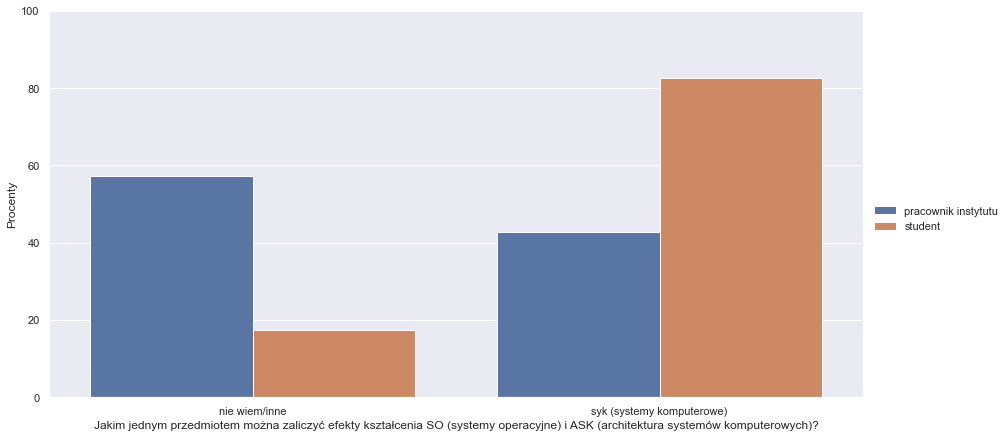

In [19]:
x = 9
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [20]:
keywords = ['zosia', 'zimowy oboz studentow informatyki']

for row in df[10]:
    if any(keyword in row for keyword in keywords):
        df[10] = df[10].replace(row, 'zosia (zimowy oboz studentow informatyki a)')
        df_plot[10] = df_plot[10].replace(row, 'zosia (zimowy oboz studentow informatyki a)')
    else:
        df_plot[10] = df_plot[10].replace(row, 'nie wiem/inne')
        
df[10].value_counts()

zosia (zimowy oboz studentow informatyki a)    96
nie wiem                                        2
zoska                                           1
zofia                                           1
Name: 10, dtype: int64

0                    10                                         
pracownik instytutu  zosia (zimowy oboz studentow informatyki a)    100.000000
student              zosia (zimowy oboz studentow informatyki a)     95.348837
                     nie wiem/inne                                    4.651163
Name: 10, dtype: float64


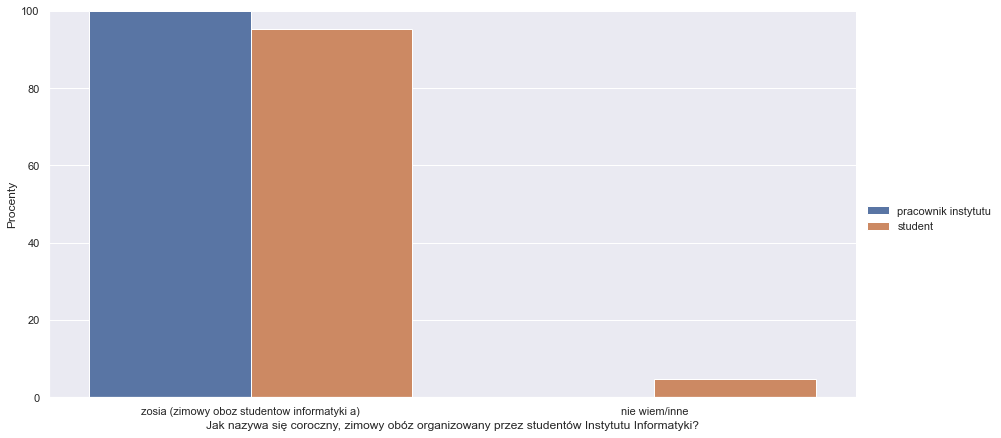

In [21]:
x = 10
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [22]:
keywords = ['grzyb']

for row in df[11]:
    if all(keyword in row for keyword in keywords):
        df[11] = df[11].replace(row, 'grzyba')
        df_plot[11] = df_plot[11].replace(row, 'grzyba')
    else:
        df_plot[11] = df_plot[11].replace(row, 'nie wiem/inne')
        
df[11].value_counts()

grzyba          95
grziba           1
grzymbola        1
atomowego...     1
wala             1
kurvinoxa        1
Name: 11, dtype: int64

0                    11           
pracownik instytutu  grzyba           92.857143
                     nie wiem/inne     7.142857
student              grzyba           95.348837
                     nie wiem/inne     4.651163
Name: 11, dtype: float64


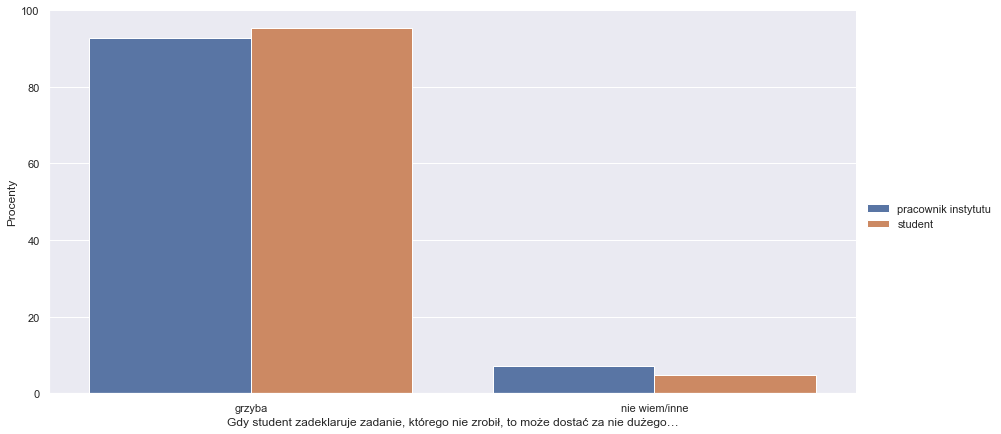

In [23]:
x = 11
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    12               
pracownik instytutu  oceny koncowe        57.142857
                     zaliczenia etapow    21.428571
                     semestry             14.285714
                     sprawdziany           7.142857
student              oceny koncowe        77.906977
                     zaliczenia etapow    17.441860
                     sprawdziany           3.488372
                     semestry              1.162791
Name: 12, dtype: float64


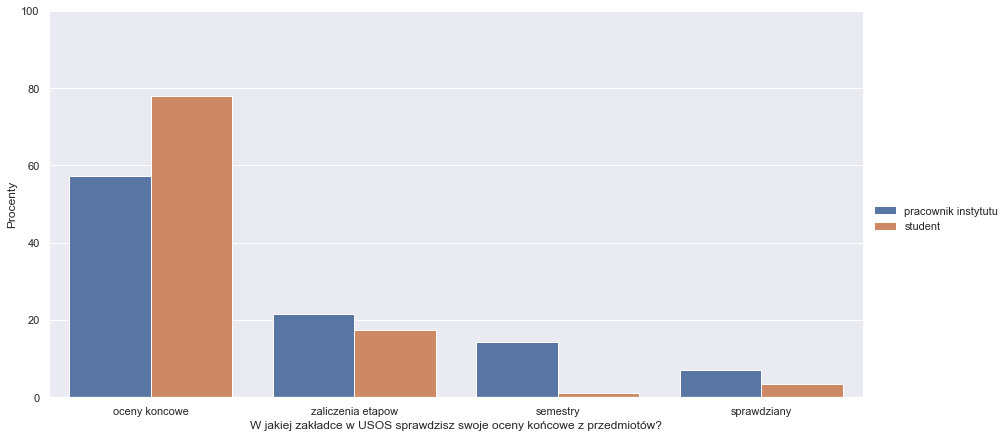

In [24]:
x = 12
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [25]:
keywords_aisd = ['aisd', 'algorytmy i struktury danych']
keywords_md = ['dyskretna', 'md']
keywords_an = ['analiza numeryczna', 'an', 'numerki']

for row in df[13]:
    if any(keyword in row for keyword in keywords_aisd) and any(keyword in row for keyword in keywords_md):
        df[13] = df[13].replace(row, 'aisd, md')
        df_plot[13] = df_plot[13].replace(row, 'aisd, md')
    elif any(keyword in row for keyword in keywords_an) and any(keyword in row for keyword in keywords_md):
        df[13] = df[13].replace(row, 'an, md')
        df_plot[13] = df_plot[13].replace(row, 'an, md')
    elif any(keyword in row for keyword in keywords_aisd) and any(keyword in row for keyword in keywords_an):
        df[13] = df[13].replace(row, 'aisd, an')
        df_plot[13] = df_plot[13].replace(row, 'aisd, an')
    else:
        df_plot[13] = df_plot[13].replace(row, 'nie wiem/inne')
        
df[13].value_counts()

an, md                                                          42
aisd, md                                                        36
aisd, an                                                         7
nie wiem                                                         5
md                                                               1
mdm i aids                                                       1
mdm, metody numeryczne                                           1
matematyka dyskretna algebra                                     1
projektowanie obiektowe oprogramowania + wszystkie seminarki     1
jfizo, ml                                                        1
aisd, jfizo                                                      1
jfizo, eksploracja tekstow czy jakos tak                         1
systemy rozproszone, algorytmy online                            1
algebra; matematyka dyskretna                                    1
Name: 13, dtype: int64

0                    13           
pracownik instytutu  aisd, md         57.142857
                     nie wiem/inne    21.428571
                     aisd, an         14.285714
                     an, md            7.142857
student              an, md           47.674419
                     aisd, md         32.558140
                     nie wiem/inne    13.953488
                     aisd, an          5.813953
Name: 13, dtype: float64


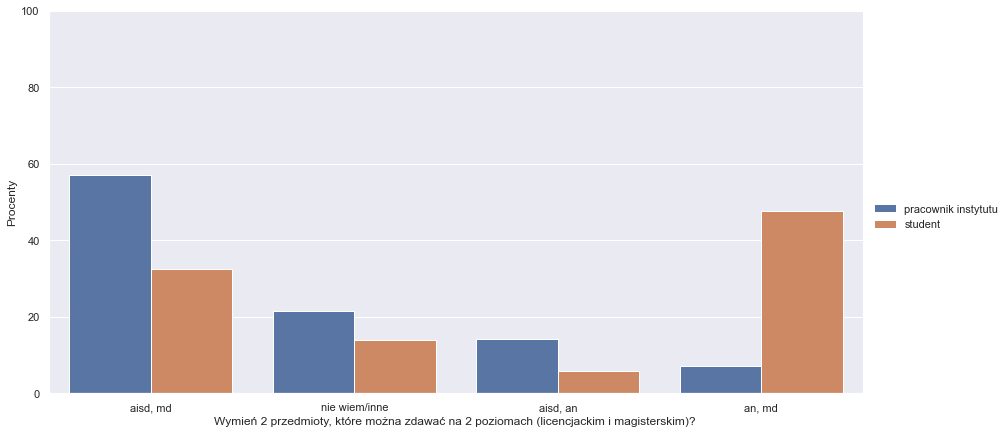

In [26]:
x = 13
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [27]:
keywords = ['dziennikarstwo', 'dziennikarstwa', 'dziennikarze', 'dziennikarski',
            'idziks', 'dzi*nnikarstwo', 'dziennnikarstwo', 'dzienmikarstwo']


for row in df[14]:
    if any(keyword in row for keyword in keywords):
        df[14] = df[14].replace(row, 'dziennikarstwa')
        df_plot[14] = df_plot[14].replace(row, 'dziennikarstwa')
    else:
        df_plot[14] = df_plot[14].replace(row, 'nie wiem/inne')
        
df[14].value_counts()

dziennikarstwa         93
matematyczny            2
nie wiem                2
streng geheim           1
instytut matematyki     1
komunikacja             1
Name: 14, dtype: int64

0                    14            
pracownik instytutu  dziennikarstwa    100.000000
student              dziennikarstwa     91.860465
                     nie wiem/inne       8.139535
Name: 14, dtype: float64


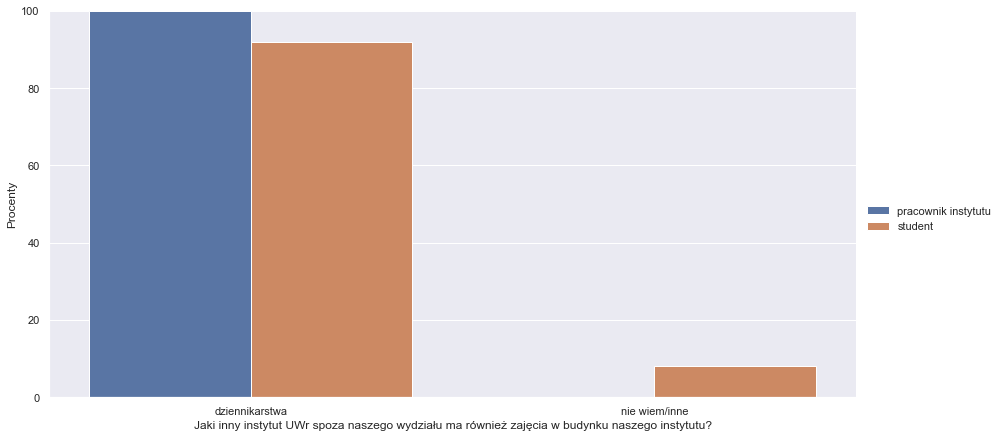

In [28]:
x = 14
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    15
pracownik instytutu  20    35.714286
                     50    35.714286
                     30    21.428571
                     10     7.142857
student              20    66.279070
                     50    17.441860
                     10     9.302326
                     30     6.976744
Name: 15, dtype: float64


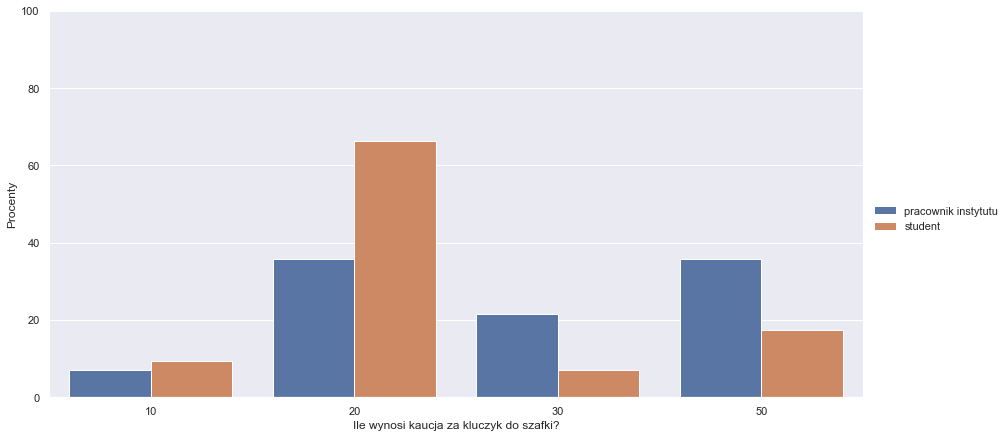

In [29]:
x = 15
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    16 
pracownik instytutu  100    57.142857
                     50     42.857143
student              100    69.767442
                     50     20.930233
                     200     8.139535
                     20      1.162791
Name: 16, dtype: float64


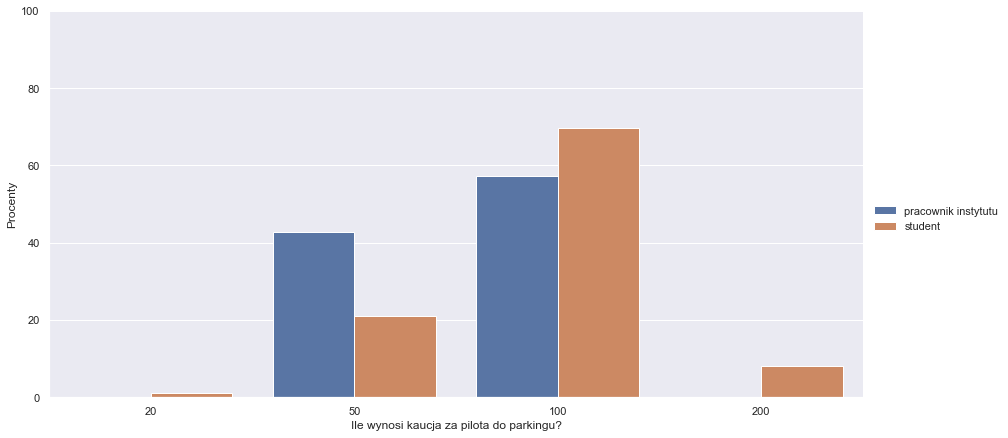

In [30]:
x = 16
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [31]:
keywords = ['aisd', 'algorytmy i struktury danych', 'aids', 'algortymy i struktury danych']


for row in df[17]:
    if any(keyword in row for keyword in keywords):
        df[17] = df[17].replace(row, 'aisd')
        df_plot[17] = df_plot[17].replace(row, 'aisd')
    else:
        df_plot[17] = df_plot[17].replace(row, 'nie wiem/inne')
        
df[17].value_counts()

aisd                      92
nie wiem                   5
metody programowania       1
algebra                    1
logik dla informatykow     1
Name: 17, dtype: int64

0                    17           
pracownik instytutu  aisd             71.428571
                     nie wiem/inne    28.571429
student              aisd             95.348837
                     nie wiem/inne     4.651163
Name: 17, dtype: float64


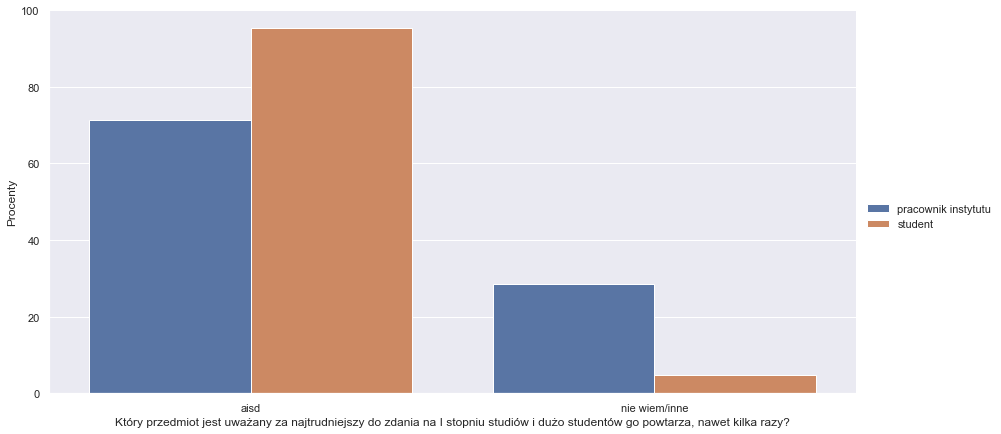

In [32]:
x = 17
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    18
pracownik instytutu  4     64.285714
                     5     35.714286
student              4     75.581395
                     5     17.441860
                     3      3.488372
                     6      3.488372
Name: 18, dtype: float64


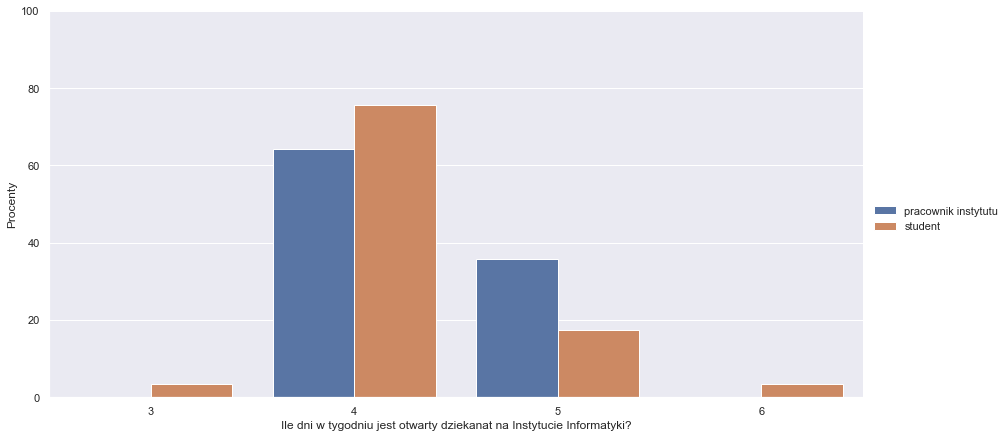

In [33]:
x = 18
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [34]:
keywords = ['polaka']


for row in df[19]:
    if any(keyword in row for keyword in keywords):
        df[19] = df[19].replace(row, 'benedykta polaka')
        df_plot[19] = df_plot[19].replace(row, 'benedykta polaka')
    else:
        df_plot[19] = df_plot[19].replace(row, 'nie wiem/inne')
        
df_plot[19].value_counts()

nie wiem/inne       68
benedykta polaka    32
Name: 19, dtype: int64

0                    19              
pracownik instytutu  benedykta polaka    64.285714
                     nie wiem/inne       35.714286
student              nie wiem/inne       73.255814
                     benedykta polaka    26.744186
Name: 19, dtype: float64


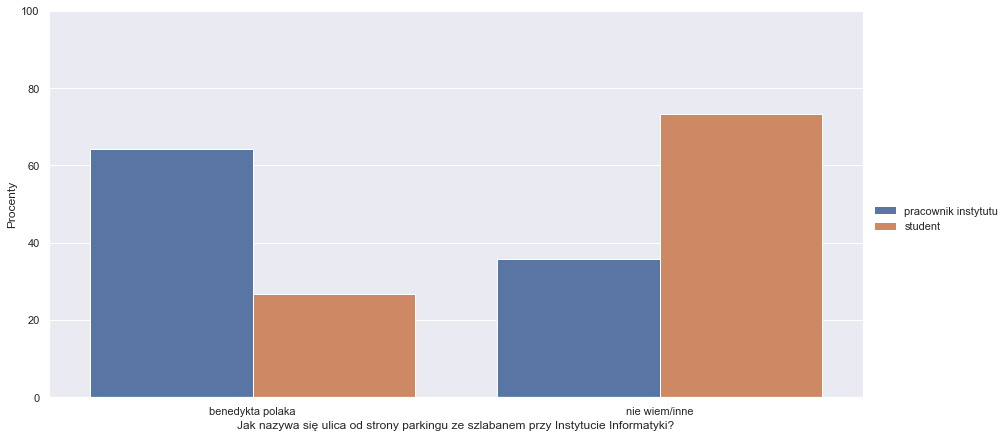

In [35]:
x = 19
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [36]:
keywords = ['bravo']


for row in df[20]:
    if any(keyword in row for keyword in keywords):
        df[20] = df[20].replace(row, 'bravo')
        df_plot[20] = df_plot[20].replace(row, 'bravo')
    else:
        df_plot[20] = df_plot[20].replace(row, 'nie wiem/inne')
        
df[20].value_counts()

bravo                                            59
nie wiem                                         31
brawo                                             2
pizza hut                                         2
benedykta polaka                                  1
la vida lokal, slice of heaven                    1
jakas na b to chyba byla, niedaleko biedronki     1
brawo!                                            1
remont                                            1
marco                                             1
Name: 20, dtype: int64

0                    20           
pracownik instytutu  bravo            71.428571
                     nie wiem/inne    28.571429
student              bravo            56.976744
                     nie wiem/inne    43.023256
Name: 20, dtype: float64


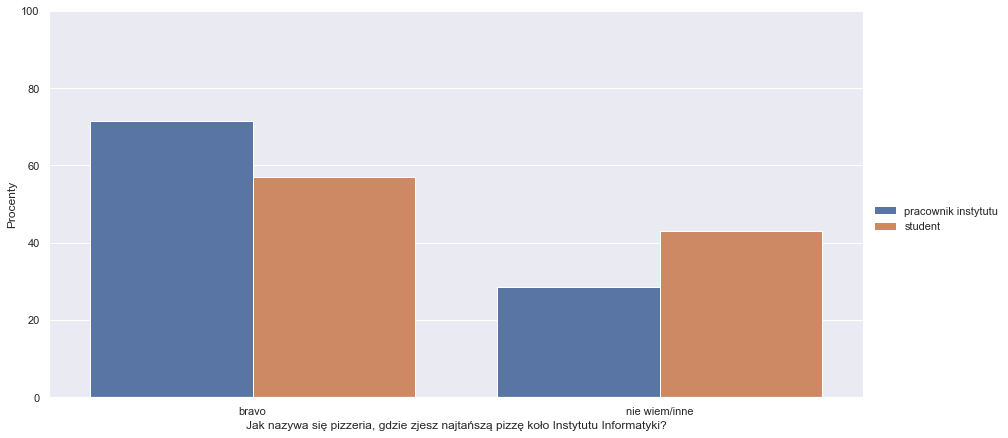

In [37]:
x = 20
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [38]:
keywords = ['kolo', 'studentow', 'inf']


for row in df[21]:
    if all(keyword in row for keyword in keywords):
        df[21] = df[21].replace(row, 'kolo studentow informatyki')
        df_plot[21] = df_plot[21].replace(row, 'kolo studentow informatyki')
    else:
        df_plot[21] = df_plot[21].replace(row, 'nie wiem/inne')
        
print(df[21].value_counts())
print(df_plot[21].value_counts())

kolo studentow informatyki           84
nie wiem                              7
klub studentow informatyki            4
klub zabawy                           1
klub sympatykow informatyki           1
kolesiostwo studentow informatyki     1
koo studentow informatyki             1
kolko studentow informatyki           1
Name: 21, dtype: int64
kolo studentow informatyki    84
nie wiem/inne                 16
Name: 21, dtype: int64


0                    21                        
pracownik instytutu  kolo studentow informatyki    85.714286
                     nie wiem/inne                 14.285714
student              kolo studentow informatyki    83.720930
                     nie wiem/inne                 16.279070
Name: 21, dtype: float64


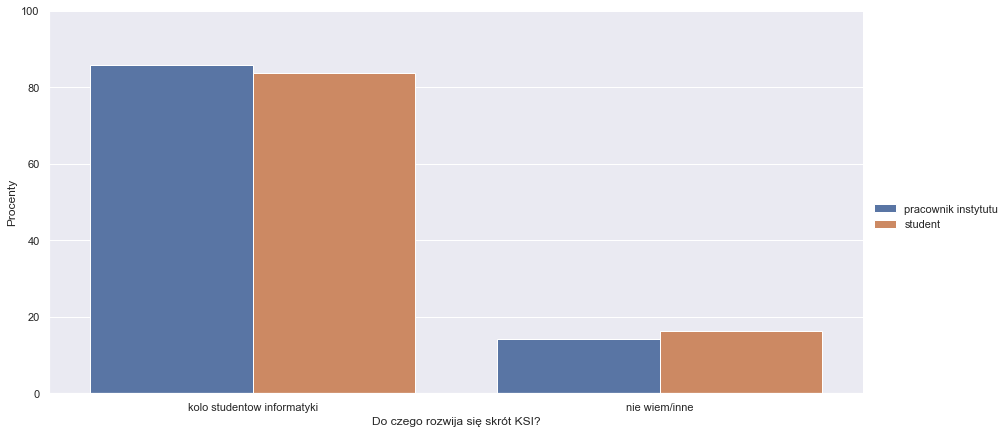

In [39]:
x = 21
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    22
pracownik instytutu  35    78.571429
                     40    14.285714
                     45     7.142857
student              35    81.395349
                     30     8.139535
                     40     5.813953
                     45     4.651163
Name: 22, dtype: float64


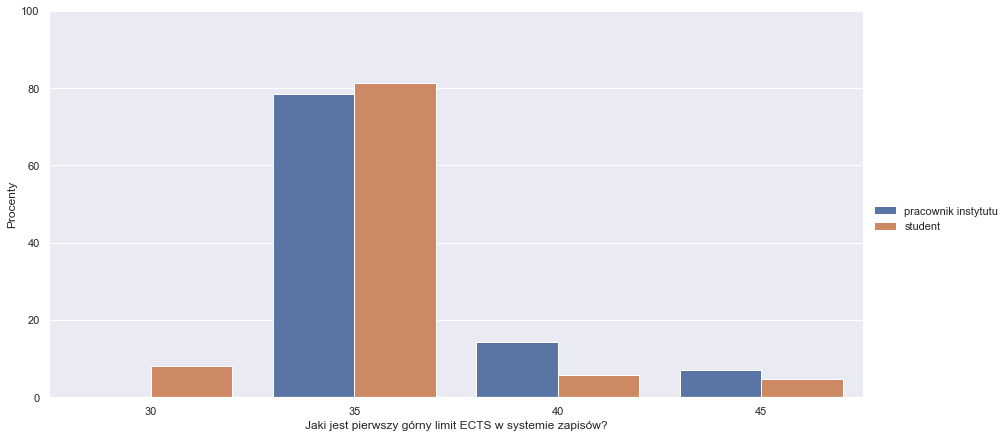

In [40]:
x = 22
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    23
pracownik instytutu  50    35.714286
                     60    35.714286
                     45    21.428571
                     40     7.142857
student              45    51.162791
                     60    32.558140
                     50    15.116279
                     40     1.162791
Name: 23, dtype: float64


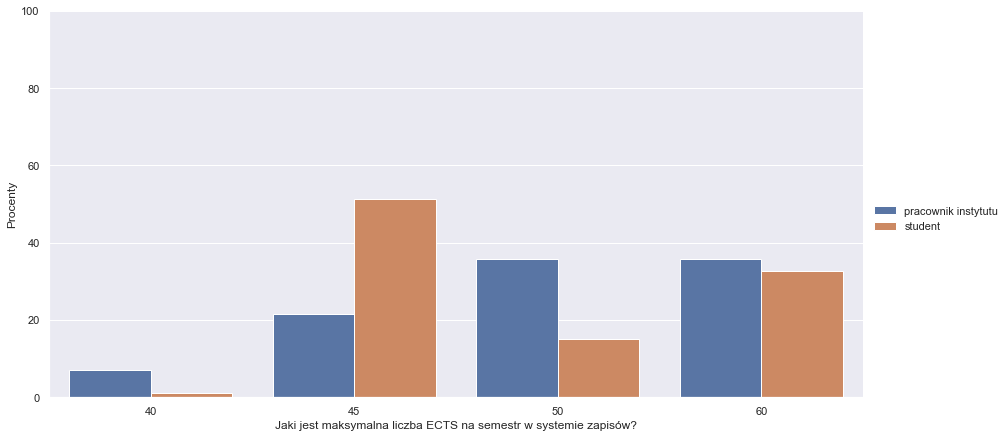

In [41]:
x = 23
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [42]:
keywords = ['jma', 'marcinkowski']


for row in df[24]:
    if any(keyword in row for keyword in keywords):
        df[24] = df[24].replace(row, 'jerzy marcinkowski')
        df_plot[24] = df_plot[24].replace(row, 'jerzy marcinkowski')
    else:
        df_plot[24] = df_plot[24].replace(row, 'nie wiem/inne')
        
df[24].value_counts()

jerzy marcinkowski    50
nie wiem              37
tomasz jurdzinski      3
jan otop               3
jurdzinski             2
krzysztof lorys        1
jerzy marcinkowki      1
seksista i buc         1
jurek                  1
otop(?)                1
Name: 24, dtype: int64

0                    24                
pracownik instytutu  jerzy marcinkowski    92.857143
                     nie wiem/inne          7.142857
student              nie wiem/inne         56.976744
                     jerzy marcinkowski    43.023256
Name: 24, dtype: float64


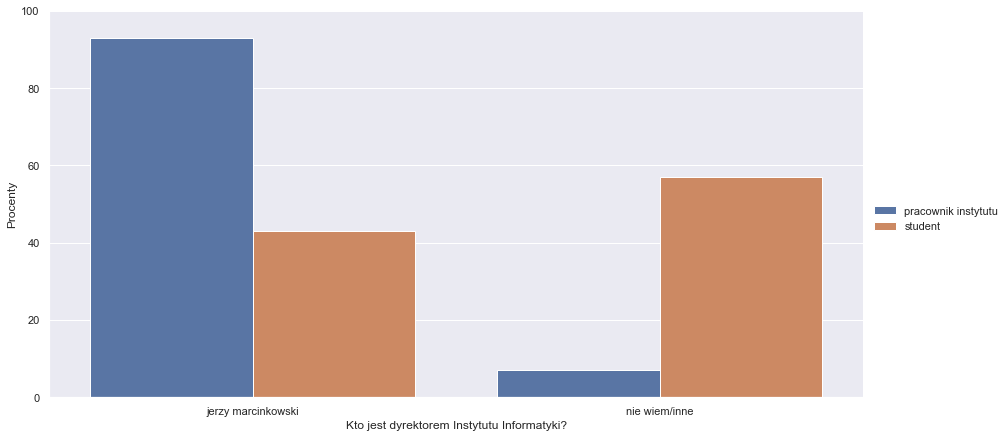

In [43]:
x = 24
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    25
pracownik instytutu  4     42.857143
                     3     28.571429
                     1     21.428571
                     2      7.142857
student              2     53.488372
                     1     31.395349
                     4      8.139535
                     3      6.976744
Name: 25, dtype: float64


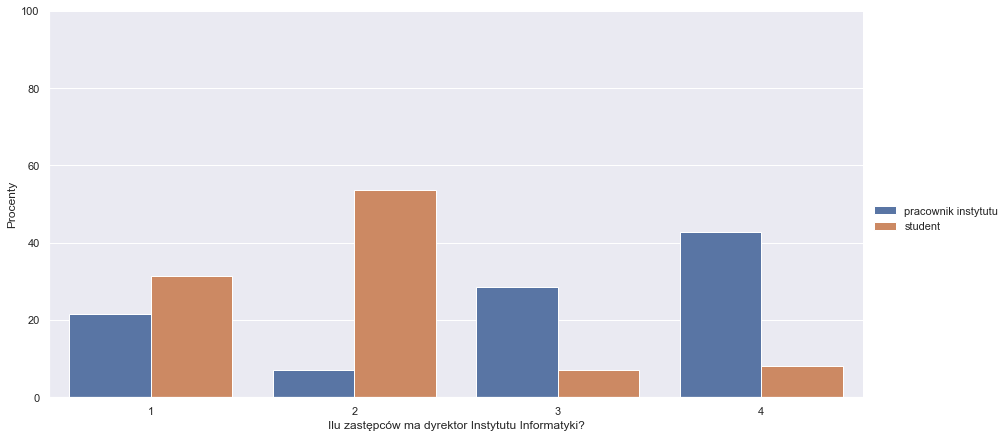

In [44]:
x = 25
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [45]:
keywords = ['plastyczna', 'platyczna']


for row in df[26]:
    if any(keyword in row for keyword in keywords):
        df[26] = df[26].replace(row, 'plastyczna')
        df_plot[26] = df_plot[26].replace(row, 'plastyczna')
    else:
        df_plot[26] = df_plot[26].replace(row, 'nie wiem/inne')
        
df[26].value_counts()

plastyczna         82
nie wiem           11
budzik              2
habibi doner xd     1
sloneczna           1
kultowa             1
plastykowa          1
artystyczna         1
Name: 26, dtype: int64

0                    26           
pracownik instytutu  plastyczna       92.857143
                     nie wiem/inne     7.142857
student              plastyczna       80.232558
                     nie wiem/inne    19.767442
Name: 26, dtype: float64


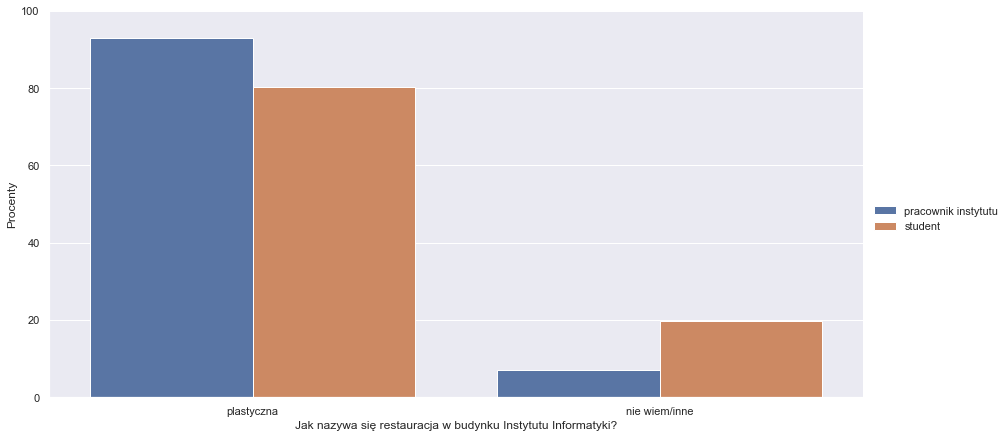

In [46]:
x = 26
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    27
pracownik instytutu  24    71.428571
                     12    21.428571
                     48     7.142857
student              24    82.558140
                     48    10.465116
                     12     6.976744
Name: 27, dtype: float64


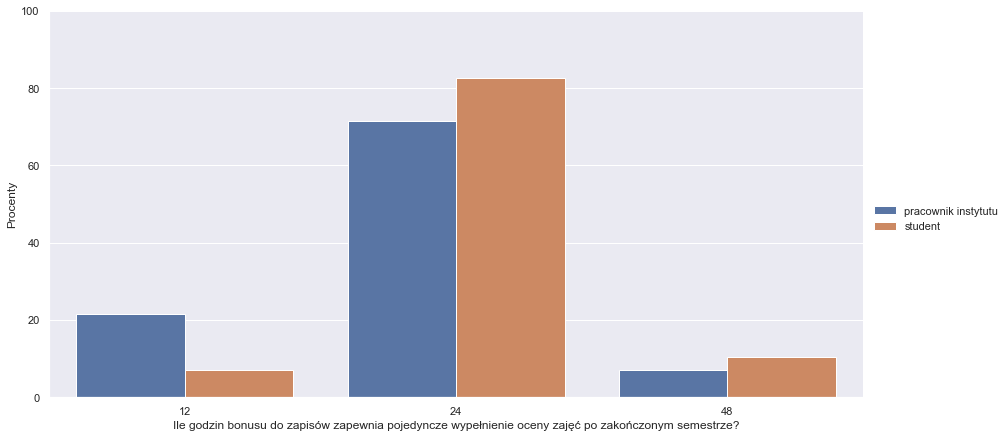

In [47]:
x = 27
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    28
pracownik instytutu  3     92.857143
                     10     7.142857
student              3     96.511628
                     5      3.488372
Name: 28, dtype: float64


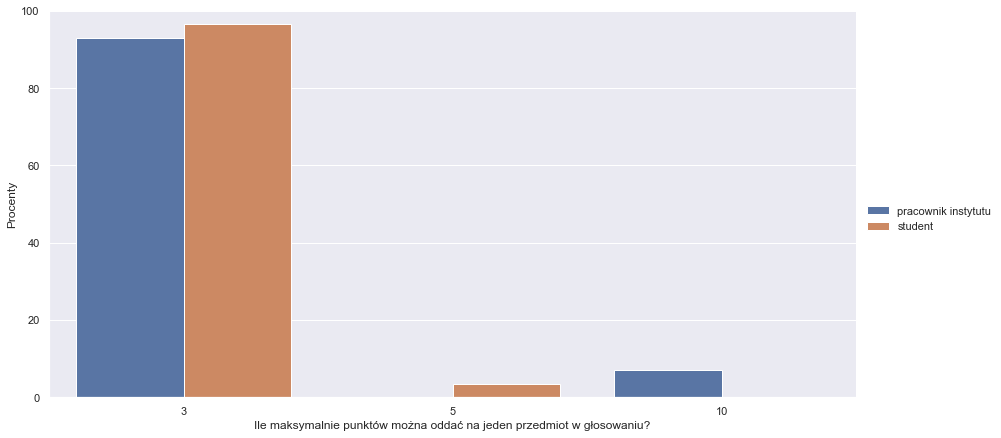

In [48]:
x = 28
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    29               
pracownik instytutu  lukasz piwowar       71.428571
                     jakub kowalski       14.285714
                     wiktor zychla        14.285714
student              lukasz piwowar       72.093023
                     jakub kowalski       11.627907
                     wiktor zychla         9.302326
                     marcin mlotkowski     6.976744
Name: 29, dtype: float64


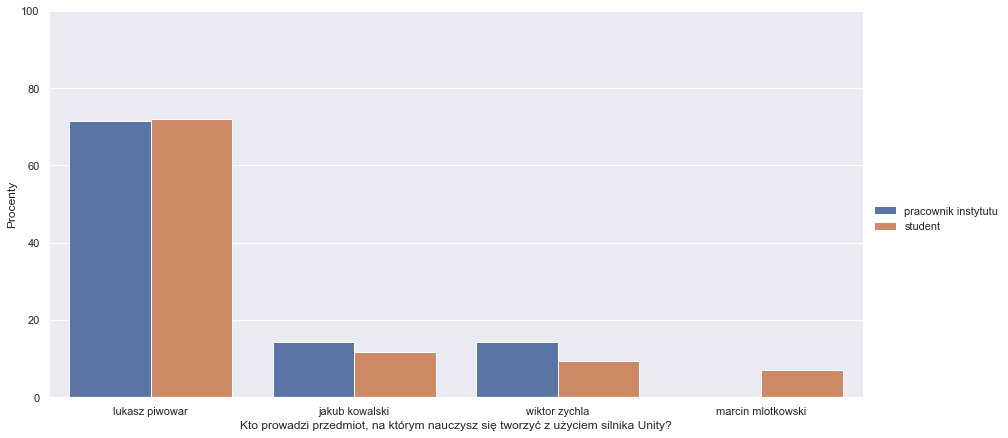

In [49]:
x = 29
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    30                             
pracownik instytutu  osoba ukryla swoje dane osobowe    85.714286
                     osoba jest z erasmusa              14.285714
student              osoba ukryla swoje dane osobowe    98.837209
                     osoba jest z erasmusa               1.162791
Name: 30, dtype: float64


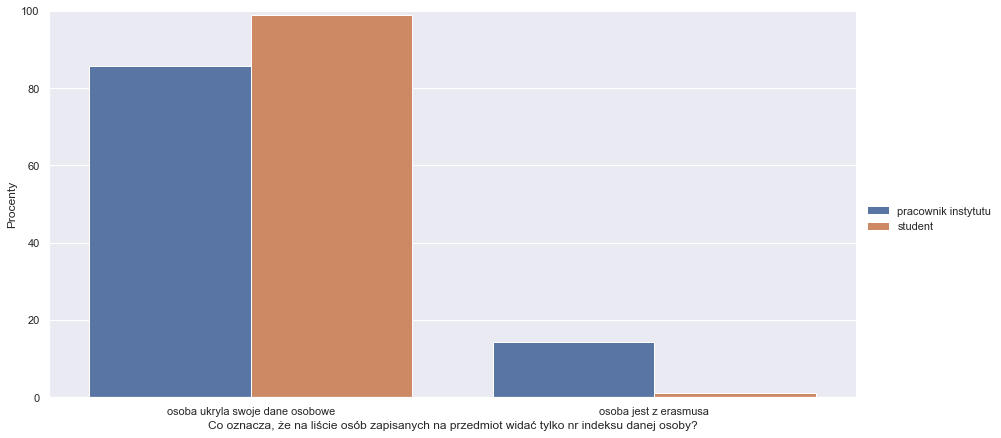

In [50]:
x = 30
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    31
pracownik instytutu  12    50.000000
                     24    42.857143
                     72     7.142857
student              24    87.209302
                     12    12.790698
Name: 31, dtype: float64


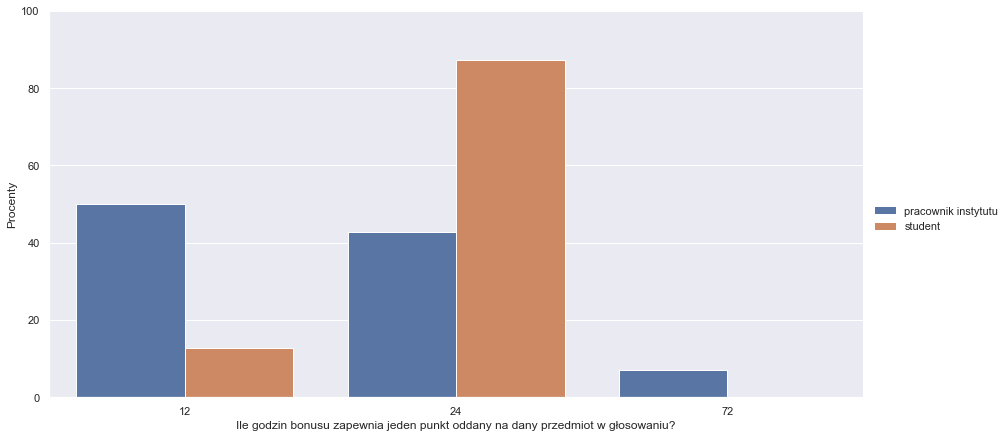

In [51]:
x = 31
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    32               
pracownik instytutu  sprawdziany          78.571429
                     listy zadan          14.285714
                     zaliczenia etapow     7.142857
student              sprawdziany          90.697674
                     listy zadan           6.976744
                     zaliczenia etapow     2.325581
Name: 32, dtype: float64


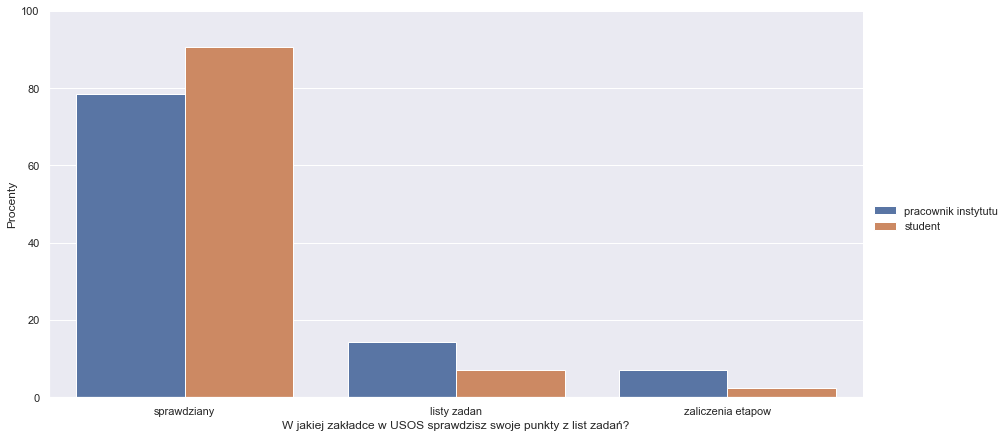

In [52]:
x = 32
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    33                   
pracownik instytutu  do kolejki               92.857143
                     do listy oczekujacych     7.142857
student              do kolejki               93.023256
                     do listy oczekujacych     5.813953
                     do listy rezerwowej       1.162791
Name: 33, dtype: float64


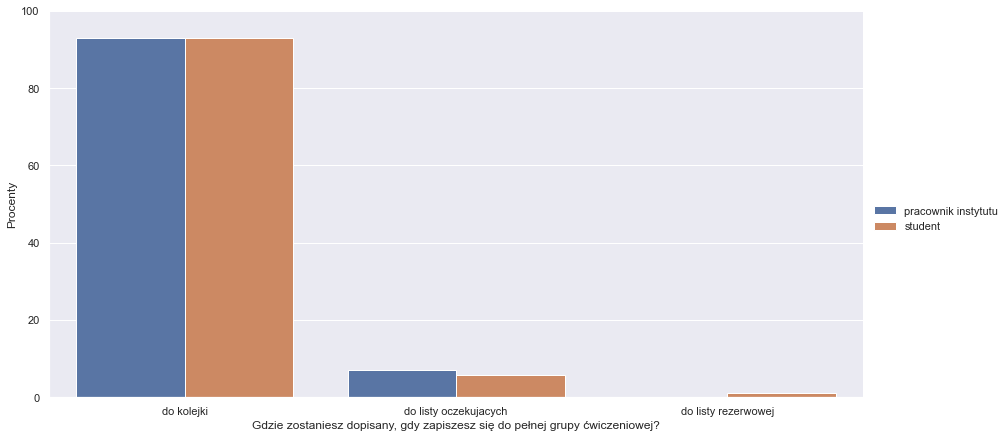

In [53]:
x = 33
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [54]:
keywords = ['matematyki i informatyki', 'wmi', 'matemetyki i informatyki']
keywords_wrong_answer = ['informatyki i matematyki']


for row in df[34]:
    if any(keyword in row for keyword in keywords):
        df[34] = df[34].replace(row, 'wydzial matematyki i informatyki')
        df_plot[34] = df_plot[34].replace(row, 'wydzial matematyki i informatyki')
    elif any(keyword in row for keyword in keywords_wrong_answer):
        df[34] = df[34].replace(row, 'wydzial informatyki i matematyki')
        df_plot[34] = df_plot[34].replace(row, 'wydzial informatyki i matematyki')
    else:
        df_plot[34] = df_plot[34].replace(row, 'nie wiem/inne')
        
df[34].value_counts()

wydzial matematyki i informatyki    82
nie wiem                             8
wydzial informatyki i matematyki     8
matematyczno informatyczny           1
mat inf                              1
Name: 34, dtype: int64

0                    34                              
pracownik instytutu  wydzial matematyki i informatyki    100.000000
student              wydzial matematyki i informatyki     79.069767
                     nie wiem/inne                        11.627907
                     wydzial informatyki i matematyki      9.302326
Name: 34, dtype: float64


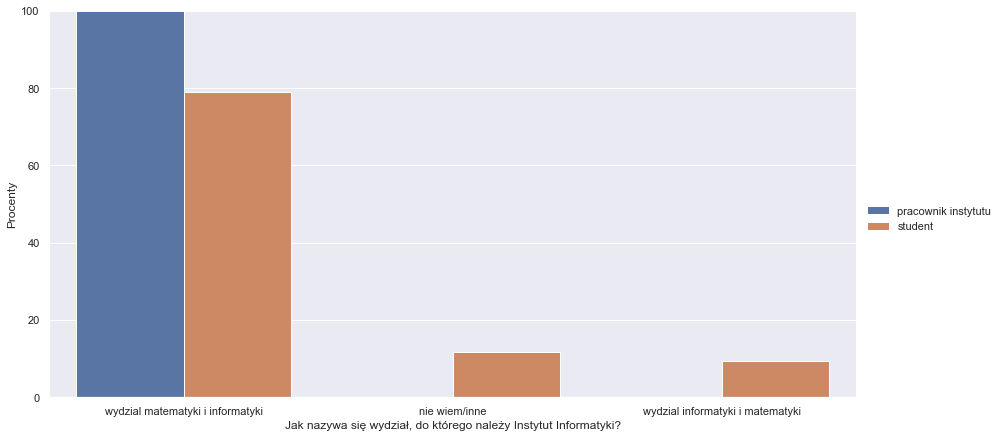

In [55]:
x = 34
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    35
pracownik instytutu  6     92.857143
                     7      7.142857
student              6     96.511628
                     5      2.325581
                     7      1.162791
Name: 35, dtype: float64


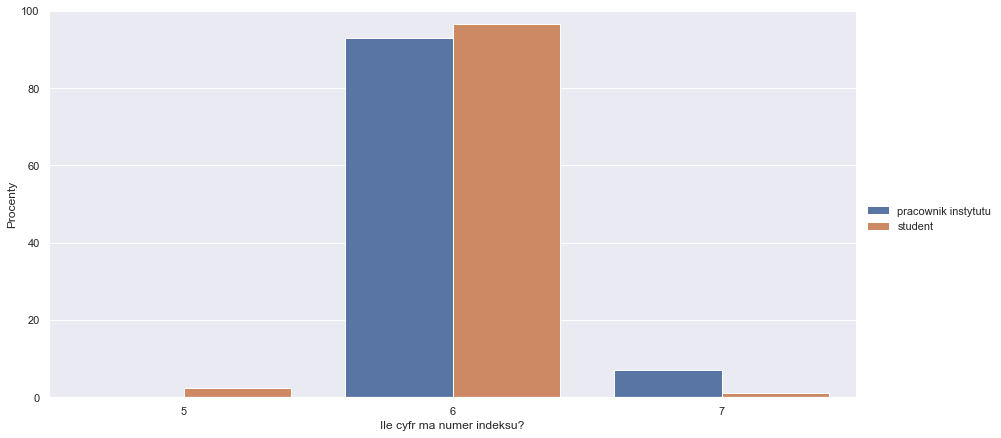

In [56]:
x = 35
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [57]:
keywords = ['sieci komputerowe']
keywords_wrong_answer = ['systemy komputerowe']


for row in df[36]:
    if all(keyword in row for keyword in keywords):
        df[36] = df[36].replace(row, 'sieci komputerowe')
        df_plot[36] = df_plot[36].replace(row, 'sieci komputerowe')
    elif all(keyword in row for keyword in keywords_wrong_answer):
        df[36] = df[36].replace(row, 'systemy komputerowe')
        df_plot[36] = df_plot[36].replace(row, 'systemy komputerowe')
    else:
        df_plot[36] = df_plot[36].replace(row, 'nie wiem/inne')
        
df[36].value_counts()

sieci komputerowe                      55
systemy komputerowe                    30
nie wiem                               14
architektura systemow komputerowych     1
Name: 36, dtype: int64

0                    36                 
pracownik instytutu  systemy komputerowe    42.857143
                     sieci komputerowe      35.714286
                     nie wiem/inne          21.428571
student              sieci komputerowe      58.139535
                     systemy komputerowe    27.906977
                     nie wiem/inne          13.953488
Name: 36, dtype: float64


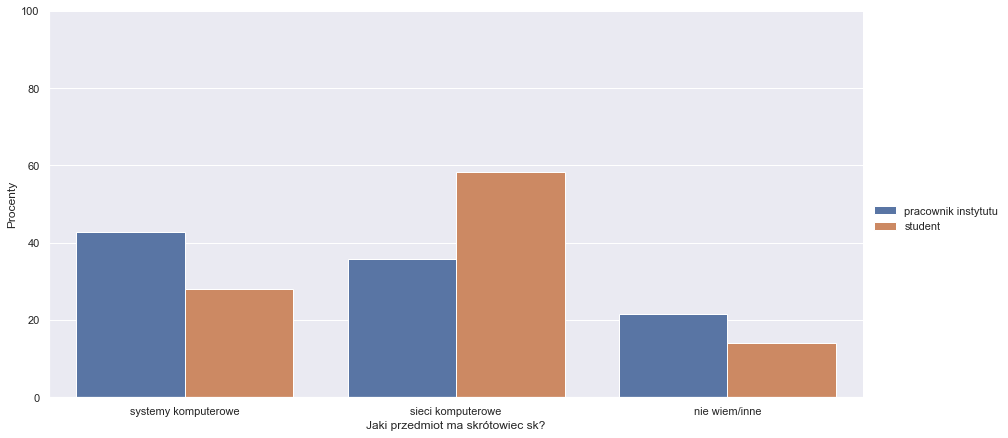

In [58]:
x = 36
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [59]:
keywords = ['projektowanie obiektowe oprogramowania', 'projektowanie obiektowe oprogranowania',
            'projektowanie obiektowe oprogramowani']
keywords_wrong_answer_first = ['programowanie obiektowe oprogramowania']
keywords_wrong_answer_second = ['projektowanie oprogramowania obiektowego']

for row in df[37]:
    if any(keyword in row for keyword in keywords):
        df[37] = df[37].replace(row, 'projektowanie obiektowe oprogramowania')
        df_plot[37] = df_plot[37].replace(row, 'projektowanie obiektowe oprogramowania')
    elif any(keyword in row for keyword in keywords_wrong_answer_first):
        df[37] = df[37].replace(row, 'programowanie obiektowe oprogramowania')
        df_plot[37] = df_plot[37].replace(row, 'programowanie obiektowe oprogramowania')
    elif any(keyword in row for keyword in keywords_wrong_answer_second):
        df[37] = df[37].replace(row, 'projektowanie oprogramowania obiektowego')
        df_plot[37] = df_plot[37].replace(row, 'projektowanie oprogramowania obiektowego')
    else:
        df_plot[37] = df_plot[37].replace(row, 'nie wiem/inne')
        
df[37].value_counts()

projektowanie obiektowe oprogramowania      50
nie wiem                                    25
programowanie obiektowe oprogramowania      12
projektowanie oprogramowania obiektowego     7
cos tam obiektowe                            1
projektowanie zorientowane obiekotowo        1
programowanie orientowano obiektowo          1
programowanie obiektowe                      1
obiektowka                                   1
projektowanie obiektowego oprogramowania     1
Name: 37, dtype: int64

0                    37                                      
pracownik instytutu  projektowanie obiektowe oprogramowania      64.285714
                     nie wiem/inne                               35.714286
student              projektowanie obiektowe oprogramowania      47.674419
                     nie wiem/inne                               30.232558
                     programowanie obiektowe oprogramowania      13.953488
                     projektowanie oprogramowania obiektowego     8.139535
Name: 37, dtype: float64


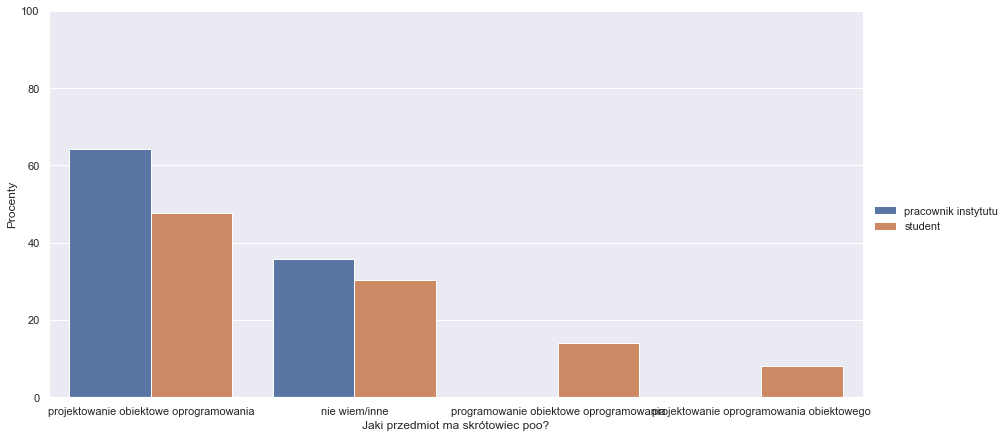

In [60]:
x = 37
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [61]:
keywords = ['komunikacja', 'czlowiek', 'komputer']
keywords_typo = ['komunikacji czlowiek komputer', 'komunikacja czlowiek kumputer']

for row in df[38]:
    if all(keyword in row for keyword in keywords) or any(keyword in row for keyword in keywords_typo):
        df[38] = df[38].replace(row, 'komunikacja czlowiek-komputer')
        df_plot[38] = df_plot[38].replace(row, 'komunikacja czlowiek-komputer')
    else:
        df_plot[38] = df_plot[38].replace(row, 'nie wiem/inne')

df[38].value_counts()

komunikacja czlowiek-komputer    74
nie wiem                         25
hci                               1
Name: 38, dtype: int64

0                    38                           
pracownik instytutu  komunikacja czlowiek-komputer    64.285714
                     nie wiem/inne                    35.714286
student              komunikacja czlowiek-komputer    75.581395
                     nie wiem/inne                    24.418605
Name: 38, dtype: float64


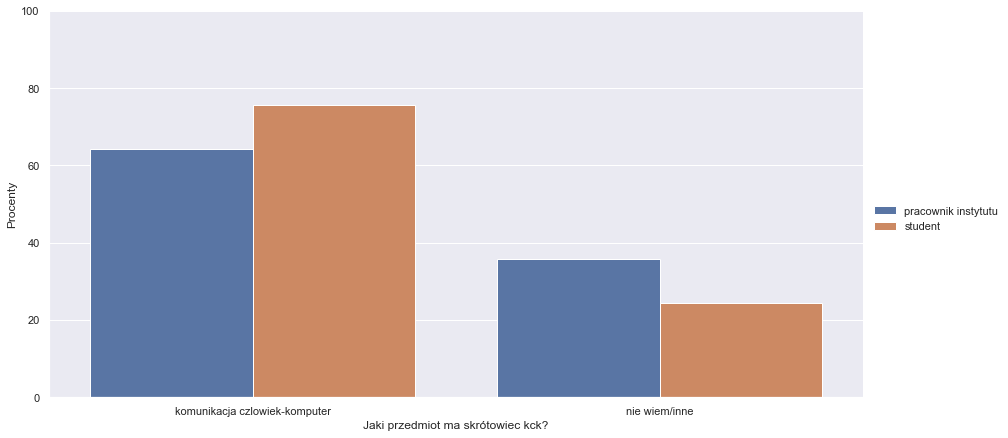

In [62]:
x = 38
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [63]:
keywords_first = ['rachunek']
keywords_second = ['prawdopodobienstwa', 'pp', 'prwd', 'pstwa', 'prawd', 'orawdopodobienstwa']
keywords_third = ['statystyka', 'statystyki']

for row in df[39]:
    if (any(keyword in row for keyword in keywords_first) and 
        any(keyword in row for keyword in keywords_second) and 
        any(keyword in row for keyword in keywords_third)):
        df[39] = df[39].replace(row, 'rachunek prawdopodobienstwa i statystyka')
        df_plot[39] = df_plot[39].replace(row, 'rachunek prawdopodobienstwa i statystyka')
    else:
        df_plot[39] = df_plot[39].replace(row, 'nie wiem/inne')

df[39].value_counts()

rachunek prawdopodobienstwa i statystyka    90
nie wiem                                     9
rachunek prawdopodobienstwa                  1
Name: 39, dtype: int64

0                    39                                      
pracownik instytutu  rachunek prawdopodobienstwa i statystyka    85.714286
                     nie wiem/inne                               14.285714
student              rachunek prawdopodobienstwa i statystyka    90.697674
                     nie wiem/inne                                9.302326
Name: 39, dtype: float64


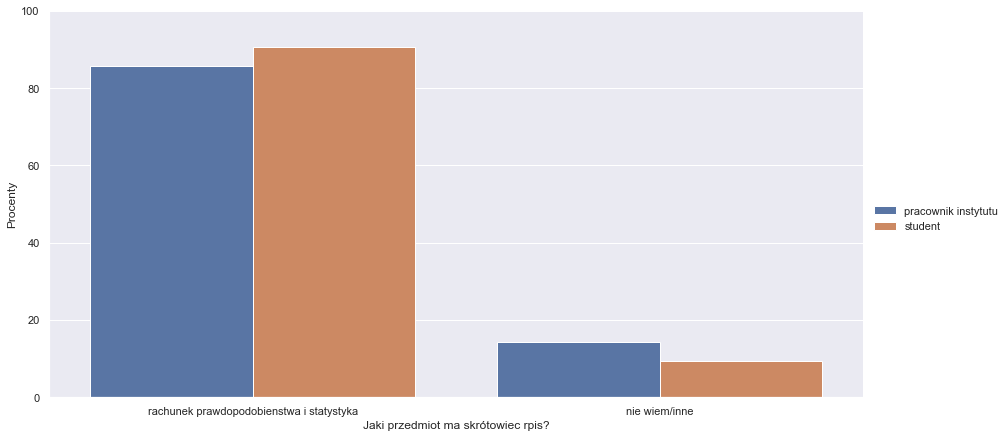

In [64]:
x = 39
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    40                    
pracownik instytutu  zdzislaw ploski           92.857143
                     pawel laskos-grabowski     7.142857
student              zdzislaw ploski           86.046512
                     pawel laskos-grabowski    10.465116
                     bartosz bednarczyk         2.325581
                     rafal nowak                1.162791
Name: 40, dtype: float64


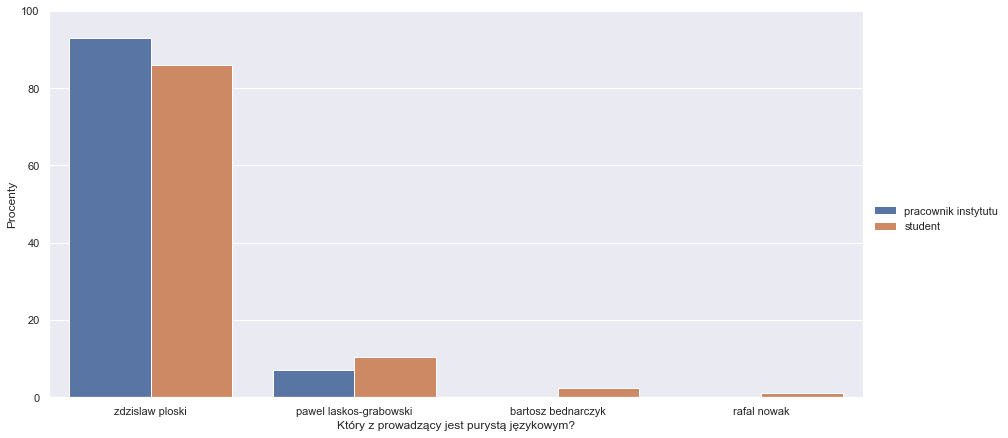

In [65]:
x = 40
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    41        
pracownik instytutu  moje konto    35.714286
                     zaliczenia    28.571429
                     moj profil    21.428571
                     wyniki        14.285714
student              moje konto    40.697674
                     zaliczenia    30.232558
                     moj profil    25.581395
                     wyniki         3.488372
Name: 41, dtype: float64


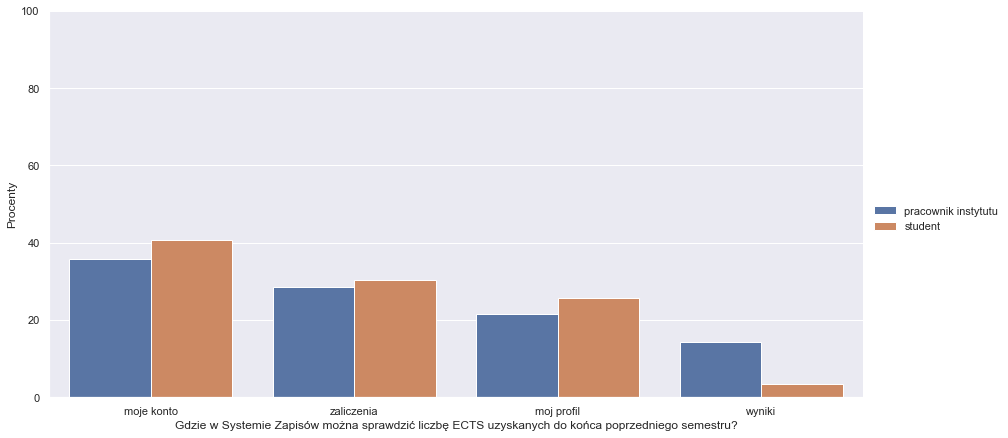

In [66]:
x = 41
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [67]:
keywords = ['testowanie gier', 'tg']
keywords_ai4games = ['ai4games']
keywords_sztuczna = ['sztuczna inteligencja']
keywords_unity = ['unity']

for row in df[42]:
    if any(keyword in row for keyword in keywords):
        df[42] = df[42].replace(row, 'testowanie gier')
        df_plot[42] = df_plot[42].replace(row, 'testowanie gier')
    elif any(keyword in row for keyword in keywords_ai4games):
        df[42] = df[42].replace(row, 'ai4games')
        df_plot[42] = df_plot[42].replace(row, 'ai4games')
    elif any(keyword in row for keyword in keywords_sztuczna):
        df[42] = df[42].replace(row, 'sztuczna inteligencja')
        df_plot[42] = df_plot[42].replace(row, 'sztuczna inteligencja')
    elif any(keyword in row for keyword in keywords_unity):
        df[42] = df[42].replace(row, 'unity')
        df_plot[42] = df_plot[42].replace(row, 'unity')
    else:
        df_plot[42] = df_plot[42].replace(row, 'nie wiem/inne')

print(data_frame[42].value_counts())
df[42].value_counts()

testowanie gier                                                                                              46
nie wiem                                                                                                     29
testowanie gier komputerowych                                                                                 4
sztuczna inteligencja                                                                                         3
ai4games                                                                                                      2
sztuczna inteligencja w grach                                                                                 1
niestety juz sie nie gra w gry na testowaniu gier :'(                                                         1
ai4games (?)                                                                                                  1
tertowanie programowania                                                                                

testowanie gier                                          57
nie wiem                                                 29
sztuczna inteligencja                                     4
ai4games                                                  3
unity                                                     2
niestety juz sie nie gra w gry na testowaniu gier :'(     1
praktycznie kazdym                                        1
tertowanie programowania                                  1
kazdym                                                    1
kazdym zeby nie pasc psychicznie na tej uczelni           1
Name: 42, dtype: int64

0                    42                   
pracownik instytutu  nie wiem/inne            71.428571
                     ai4games                 14.285714
                     sztuczna inteligencja     7.142857
                     testowanie gier           7.142857
student              testowanie gier          65.116279
                     nie wiem/inne            27.906977
                     sztuczna inteligencja     3.488372
                     unity                     2.325581
                     ai4games                  1.162791
Name: 42, dtype: float64


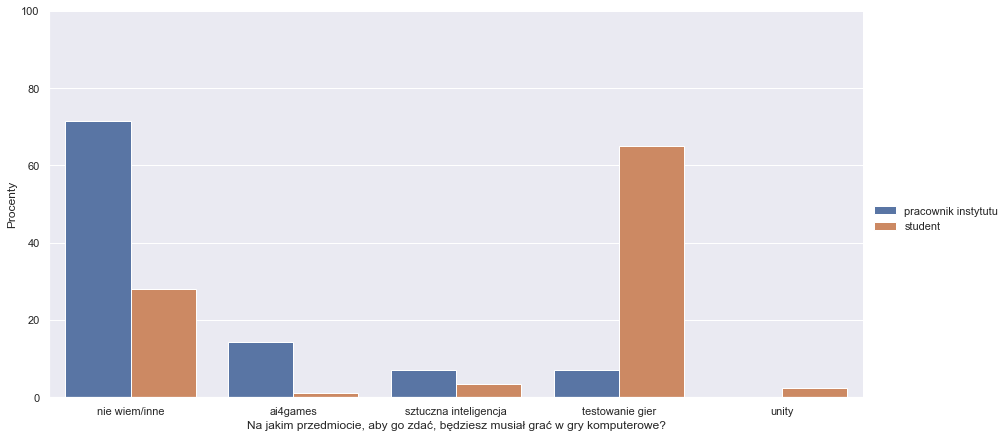

In [68]:
x = 42
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [69]:
keywords = ['most grunwaldzki', 'most gruwaldzki']

for row in df[43]:
    if any(keyword in row for keyword in keywords):
        df[43] = df[43].replace(row, 'most grunwaldzki')
        df_plot[43] = df_plot[43].replace(row, 'most grunwaldzki')
    else:
        df_plot[43] = df_plot[43].replace(row, 'nie wiem/inne')

df[43].value_counts()

most grunwaldzki    83
nie wiem            16
katedra              1
Name: 43, dtype: int64

0                    43              
pracownik instytutu  most grunwaldzki    78.571429
                     nie wiem/inne       21.428571
student              most grunwaldzki    83.720930
                     nie wiem/inne       16.279070
Name: 43, dtype: float64


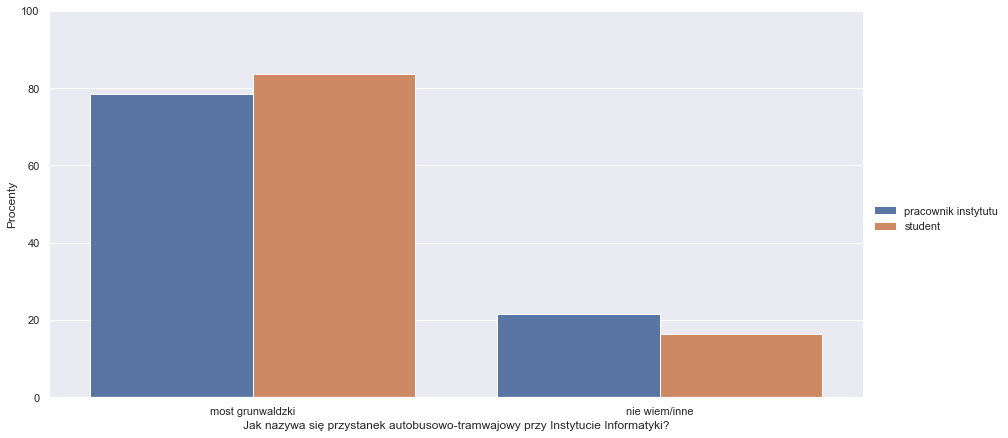

In [70]:
x = 43
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

In [71]:
keywords = ['nauki i szkolnictwa wyzszego']
keywords_wrong_answer_first = ['edukacji i nauki', 'mein']
keywords_wrong_answer_second = ['edukacji i szkolnictwa wyzszego']
keywords_wrong_answer_third = ['edukacji', 'men']
keywords_wrong_answer_fourth = ['szkolnictwa wyzszego']

for row in df[44]:
    if any(keyword in row for keyword in keywords):
        df[44] = df[44].replace(row, 'ministerstwo nauki i szkolnictwa wyzszego')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo nauki i szkolnictwa wyzszego')
    elif any(keyword in row for keyword in keywords_wrong_answer_first):
        df[44] = df[44].replace(row, 'ministerstwo edukacji i nauki')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo edukacji i nauki')
    elif any(keyword in row for keyword in keywords_wrong_answer_second):
        df[44] = df[44].replace(row, 'ministerstwo edukacji i szkolnictwa wyzszego')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo edukacji i szkolnictwa wyzszego')
    elif any(keyword in row for keyword in keywords_wrong_answer_third):
        df[44] = df[44].replace(row, 'ministerstwo edukacji')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo edukacji')
    elif any(keyword in row for keyword in keywords_wrong_answer_fourth):
        df[44] = df[44].replace(row, 'ministerstwo szkolnictwa wyzszego')
        df_plot[44] = df_plot[44].replace(row, 'ministerstwo szkolnictwa wyzszego')
    else:
        df_plot[44] = df_plot[44].replace(row, 'nie wiem/inne')

#print(data_frame[44].value_counts())
df[44].value_counts()

nie wiem                                        37
ministerstwo edukacji i nauki                   19
ministerstwo edukacji                           19
ministerstwo szkolnictwa wyzszego                7
ministerstwo edukacji i szkolnictwa wyzszego     5
ministerstwo nauki i szkolnictwa wyzszego        5
ministerstwo nauki                               2
ministerstwo oswiaty                             1
ministerstwo czarnka                             1
co                                               1
ministerstwo wodki i sledzia                     1
nauki i kultury                                  1
ministerstwo sledzia i wodki                     1
Name: 44, dtype: int64

0                    44                                          
pracownik instytutu  ministerstwo edukacji i nauki                   50.000000
                     ministerstwo edukacji                           14.285714
                     ministerstwo edukacji i szkolnictwa wyzszego    14.285714
                     ministerstwo nauki i szkolnictwa wyzszego       14.285714
                     nie wiem/inne                                    7.142857
student              nie wiem/inne                                   51.162791
                     ministerstwo edukacji                           19.767442
                     ministerstwo edukacji i nauki                   13.953488
                     ministerstwo szkolnictwa wyzszego                8.139535
                     ministerstwo edukacji i szkolnictwa wyzszego     3.488372
                     ministerstwo nauki i szkolnictwa wyzszego        3.488372
Name: 44, dtype: float64


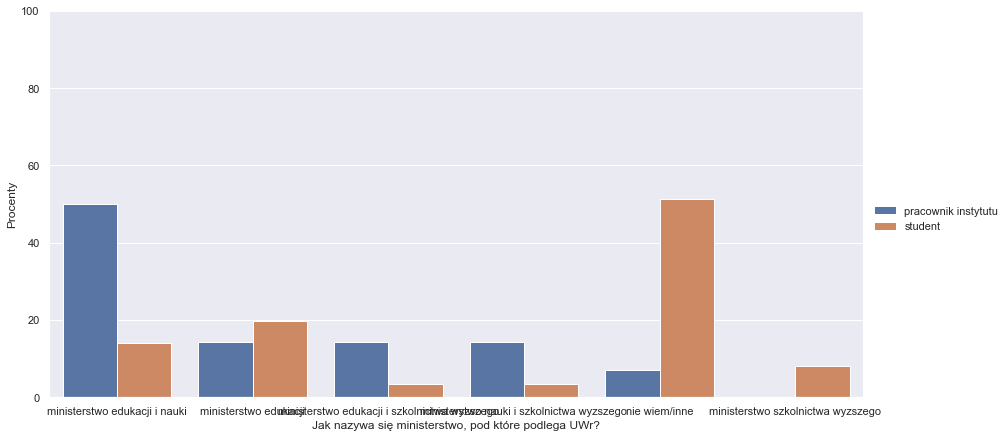

In [72]:
x = 44
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100))

0                    45                                    
pracownik instytutu  sroda                                     35.714286
                     jest otwarty od poniedzialku do piatku    28.571429
                     piatek                                    28.571429
                     poniedzialek                               7.142857
student              piatek                                    63.953488
                     jest otwarty od poniedzialku do piatku    17.441860
                     sroda                                     11.627907
                     poniedzialek                               6.976744
Name: 45, dtype: float64


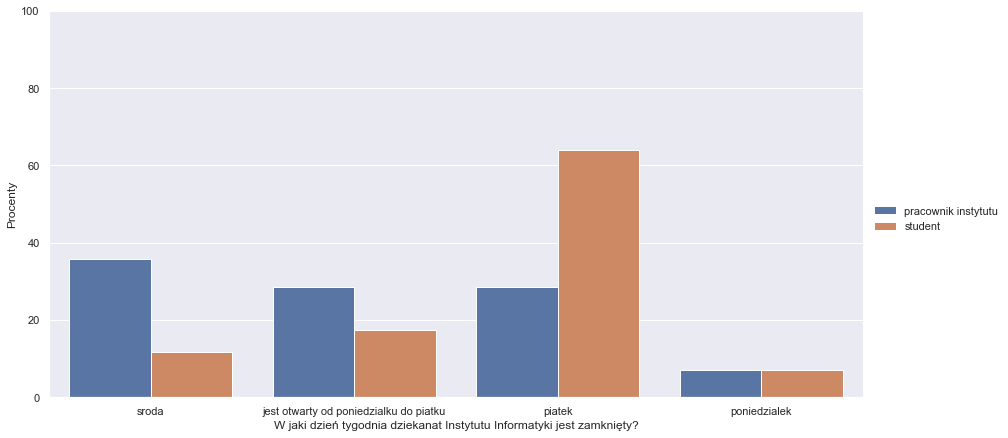

In [73]:
x = 45
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [74]:
#tylko 6 osób zna poprawną odpowiedź

keywords = ['golebnik']
keywords_polka = ['polka', 'polki', 'pulka', 'poleczki', 'poleczka']
keywords_szafka = ['szafka', 'szafeczki']

for row in df[46]:
    if any(keyword in row for keyword in keywords):
        df[46] = df[46].replace(row, 'golebnik')
        df_plot[46] = df_plot[46].replace(row, 'golebnik')
    elif any(keyword in row for keyword in keywords_polka):
        df[46] = df[46].replace(row, 'polka')
        df_plot[46] = df_plot[46].replace(row, 'polka')
    elif any(keyword in row for keyword in keywords_szafka):
        df[46] = df[46].replace(row, 'szafka')
        df_plot[46] = df_plot[46].replace(row, 'szafka')
    else:
        df_plot[46] = df_plot[46].replace(row, 'nie wiem/inne')

df[46].value_counts()

nie wiem              41
polka                 39
szafka                 7
golebnik               6
regal                  2
karmnik? xd            1
lawka                  1
to ma jakas nazwe?     1
no na listy no         1
pigeon hole            1
Name: 46, dtype: int64

0                    46           
pracownik instytutu  nie wiem/inne    50.000000
                     polka            50.000000
student              nie wiem/inne    47.674419
                     polka            37.209302
                     szafka            8.139535
                     golebnik          6.976744
Name: 46, dtype: float64


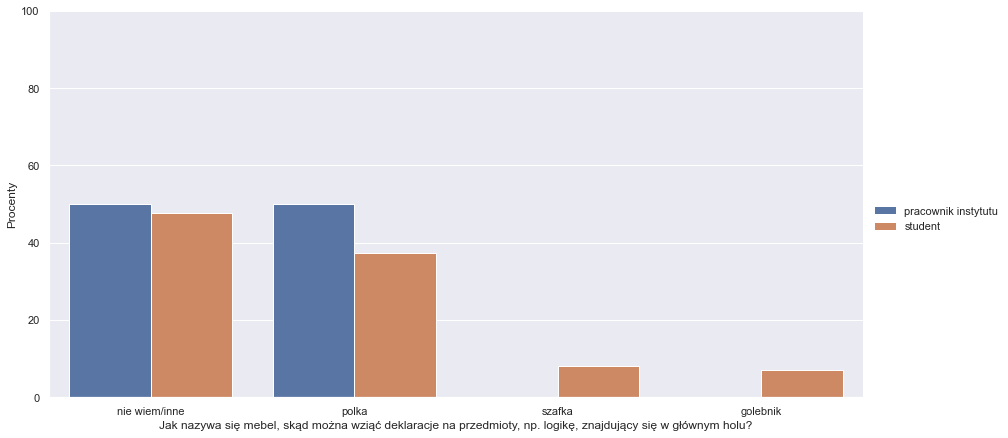

In [75]:
x = 46
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    47       
pracownik instytutu  zielony      85.714286
                     bialy         7.142857
                     niebieski     7.142857
student              zielony      79.069767
                     niebieski    18.604651
                     szary         2.325581
Name: 47, dtype: float64


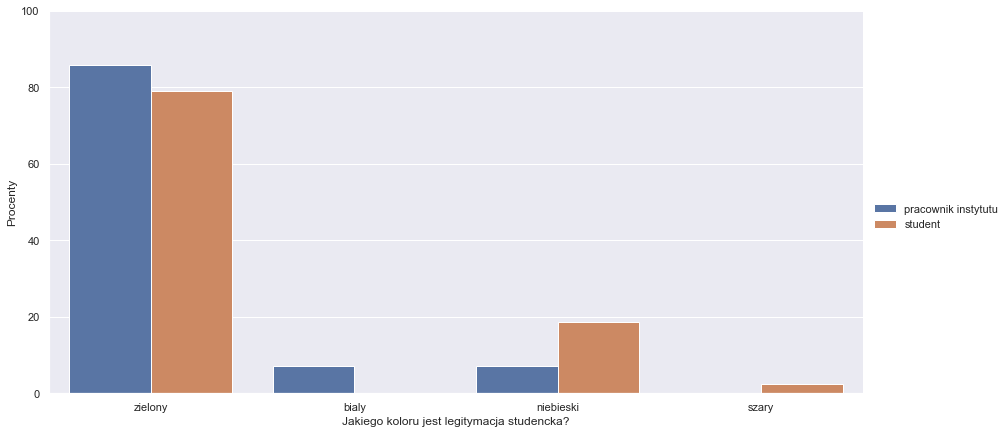

In [77]:
x = 47
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    48
pracownik instytutu  2     85.714286
                     3      7.142857
                     4      7.142857
student              2     95.348837
                     3      3.488372
                     4      1.162791
Name: 48, dtype: float64


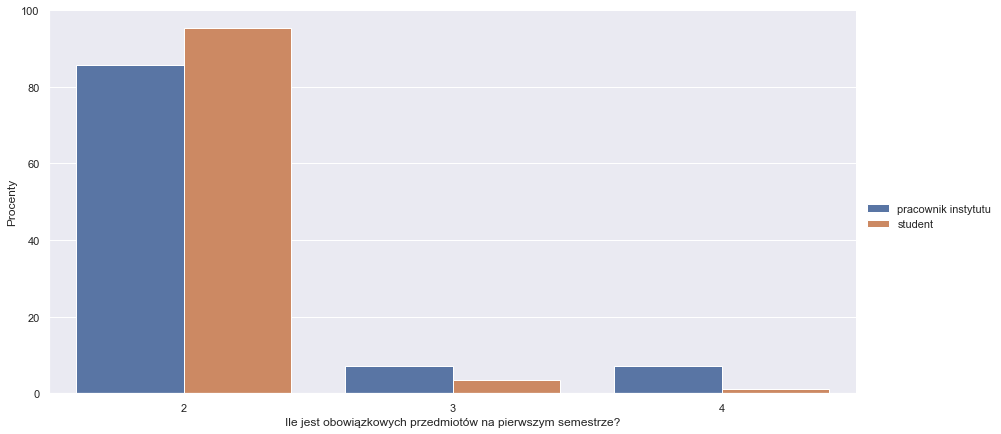

In [78]:
x = 48
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [79]:
keywords = ['system', 'komunikacji','odleglosc', 'student']
keywords_komunikacji = ['system komunikacji']
keywords_ksztalcenia = ['system ksztalcenia']

for row in df[49]:
    if all(keyword in row for keyword in keywords):
        df[49] = df[49].replace(row, 'system komunikacji na odleglosc ze studentami')
        df_plot[49] = df_plot[49].replace(row, 'system komunikacji na odleglosc ze studentami')
    elif all(keyword in row for keyword in keywords_komunikacji):
        df[49] = df[49].replace(row, 'system komunikacji...')
        df_plot[49] = df_plot[49].replace(row, 'system komunikacji...')
    elif all(keyword in row for keyword in keywords_ksztalcenia):
        df[49] = df[49].replace(row, 'system ksztalcenia...')
        df_plot[49] = df_plot[49].replace(row, 'system ksztalcenia...')
    else:
        df_plot[49] = df_plot[49].replace(row, 'nie wiem/inne')

df[49].value_counts()

nie wiem                                         46
system komunikacji na odleglosc ze studentami    32
system komunikacji...                            16
system ksztalcenia...                             5
system komputerowej oblsugi studentow             1
Name: 49, dtype: int64

0                    49                                           
pracownik instytutu  nie wiem/inne                                    42.857143
                     system ksztalcenia...                            28.571429
                     system komunikacji na odleglosc ze studentami    14.285714
                     system komunikacji...                            14.285714
student              nie wiem/inne                                    47.674419
                     system komunikacji na odleglosc ze studentami    34.883721
                     system komunikacji...                            16.279070
                     system ksztalcenia...                             1.162791
Name: 49, dtype: float64


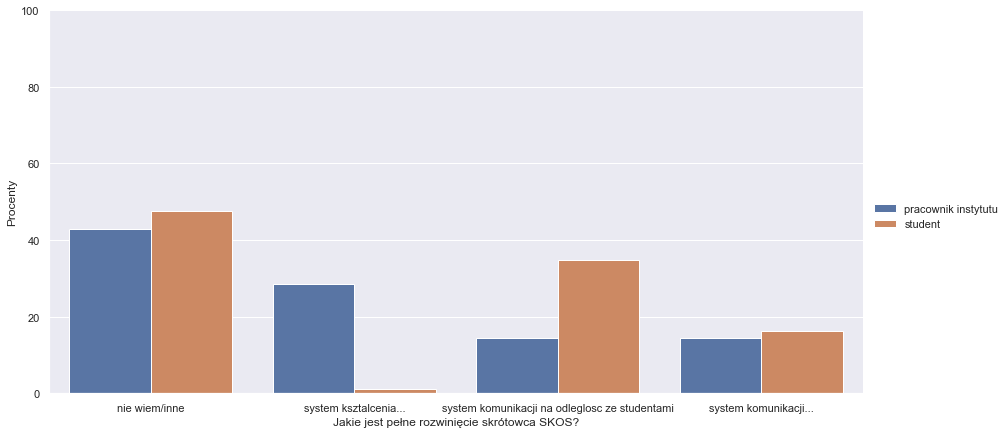

In [80]:
x = 49
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [81]:
keywords = ['mp', 'metody programowania', 'metody prog', 'metody programowaniq']

for row in df[50]:
    if any(keyword in row for keyword in keywords):
        df[50] = df[50].replace(row, 'metody programowania')
        df_plot[50] = df_plot[50].replace(row, 'metody programowania')
    else:
        df_plot[50] = df_plot[50].replace(row, 'nie wiem/inne')

df[50].value_counts()

metody programowania       90
nie wiem                    7
programowanie funkcyjne     1
chyba programowanie         1
lisp                        1
Name: 50, dtype: int64

0                    50                  
pracownik instytutu  nie wiem/inne           57.142857
                     metody programowania    42.857143
student              metody programowania    97.674419
                     nie wiem/inne            2.325581
Name: 50, dtype: float64


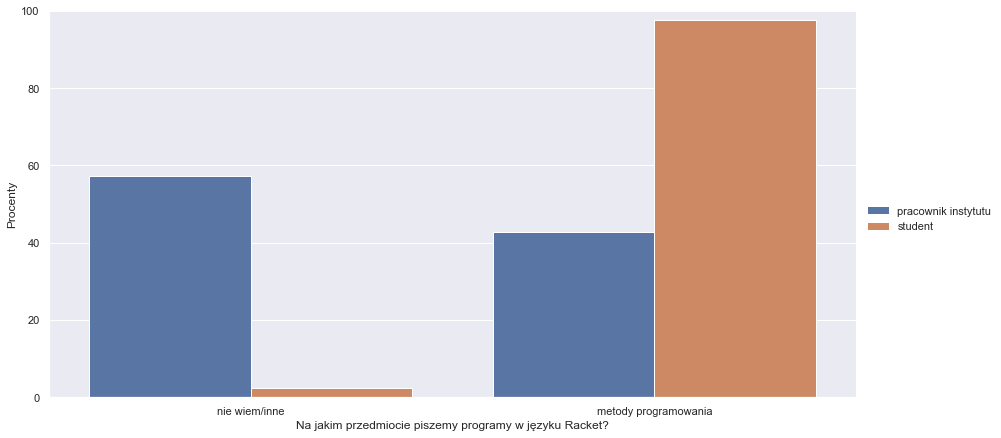

In [82]:
x = 50
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    51    
pracownik instytutu  alpaki    92.857143
                     koty       7.142857
student              alpaki    84.883721
                     psy        8.139535
                     koty       4.651163
                     kozy       2.325581
Name: 51, dtype: float64


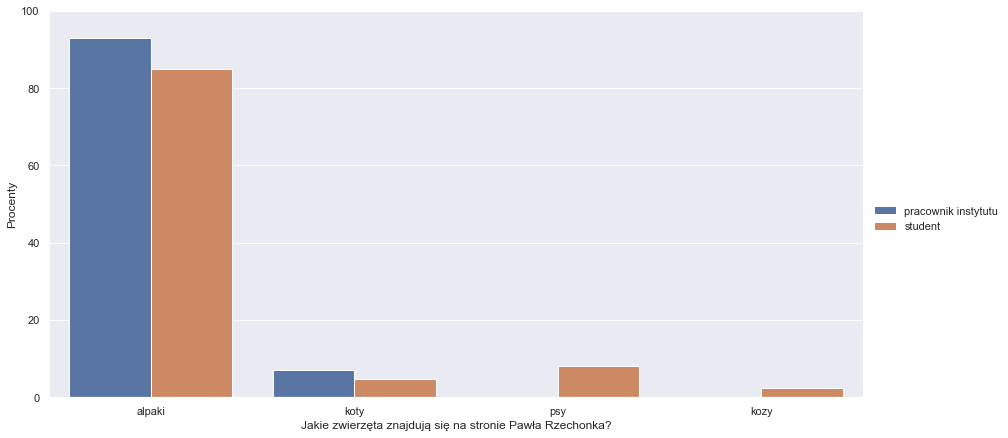

In [83]:
x = 51
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    52
pracownik instytutu  3     42.857143
                     4     42.857143
                     5     14.285714
student              4     47.674419
                     3     41.860465
                     2      6.976744
                     5      3.488372
Name: 52, dtype: float64


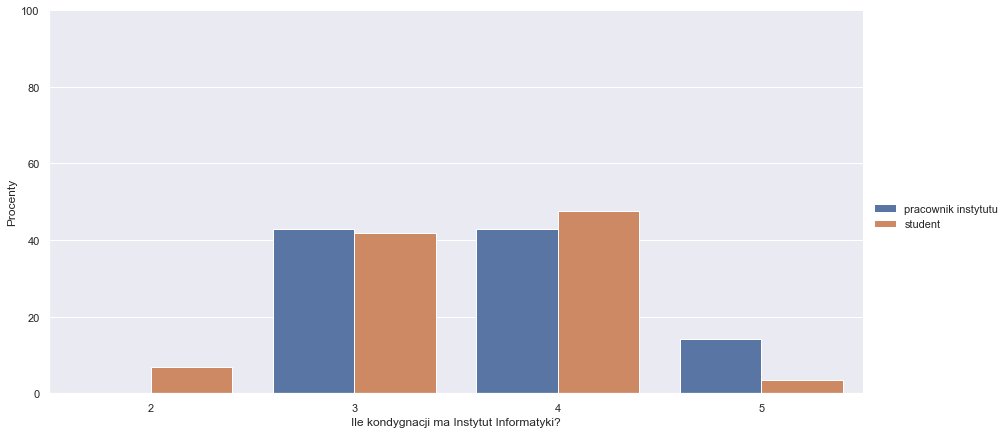

In [84]:
x = 52
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [85]:
keywords = ['jurdzinski', 'tju', 'jutdzinski']

for row in df[53]:
    if any(keyword in row for keyword in keywords):
        df[53] = df[53].replace(row, 'tomasz jurdzinski')
        df_plot[53] = df_plot[53].replace(row, 'tomasz jurdzinski')
    else:
        df_plot[53] = df_plot[53].replace(row, 'nie wiem/inne')

df[53].value_counts()

tomasz jurdzinski     64
nie wiem              24
mabi                   2
jan otop               2
marcinkowski           1
jerzy marcinkowski     1
jurdzynski             1
jarudzinski            1
tomek                  1
jan otol               1
jurczynski             1
wojciech fiolka        1
Name: 53, dtype: int64

0                    53               
pracownik instytutu  tomasz jurdzinski    92.857143
                     nie wiem/inne         7.142857
student              tomasz jurdzinski    59.302326
                     nie wiem/inne        40.697674
Name: 53, dtype: float64


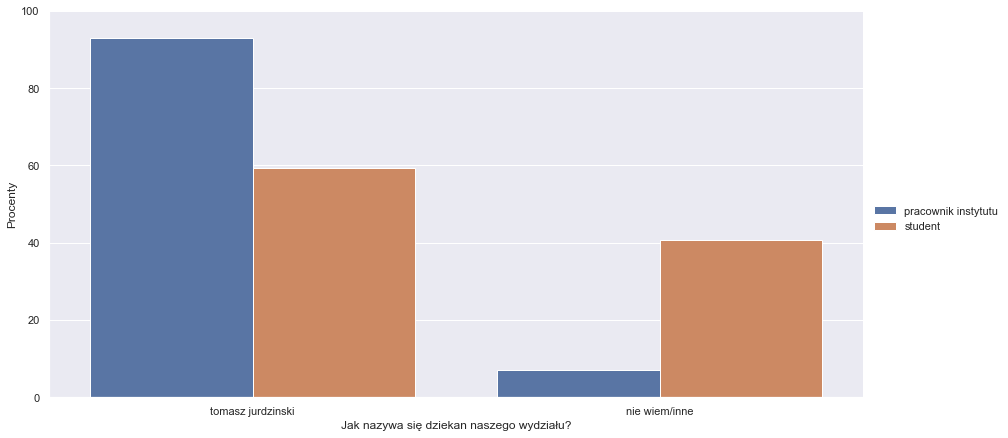

In [86]:
x = 53
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [87]:
keywords = ['prodziekan']

for row in df[54]:
    if any(keyword in row for keyword in keywords):
        df[54] = df[54].replace(row, 'prodziekan')
        df_plot[54] = df_plot[54].replace(row, 'prodziekan')
    else:
        df_plot[54] = df_plot[54].replace(row, 'nie wiem/inne')

df[54].value_counts()

prodziekan                           58
nie wiem                             37
tomasz jurdzinski                     2
biernacka malgorzata                  1
dyrektor do spraw dydaktycznych       1
zastepca dziekana ds. studenckich     1
Name: 54, dtype: int64

0                    54           
pracownik instytutu  prodziekan       64.285714
                     nie wiem/inne    35.714286
student              prodziekan       56.976744
                     nie wiem/inne    43.023256
Name: 54, dtype: float64


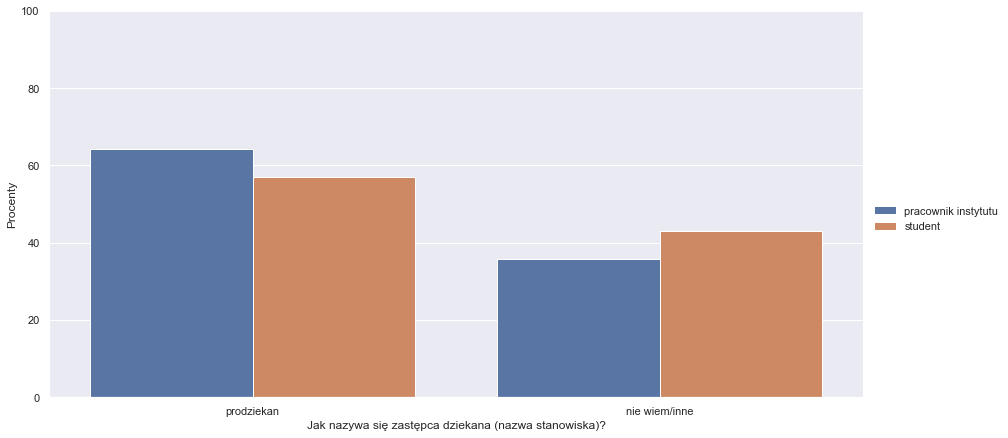

In [88]:
x = 54
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    55       
pracownik instytutu  2004-2006    85.714286
                     2000-2002     7.142857
                     2008-2010     7.142857
student              2004-2006    52.325581
                     2008-2010    22.093023
                     2000-2002    19.767442
                     2012-2014     5.813953
Name: 55, dtype: float64


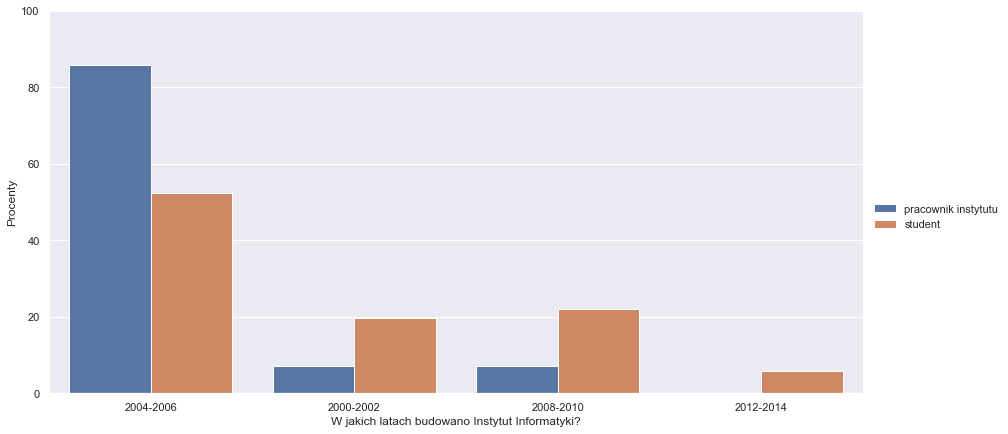

In [89]:
x = 55
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [90]:
keywords = ['olkiewicz']
keywords_wiszewski = ['wiszewski']

for row in df[56]:
    if any(keyword in row for keyword in keywords):
        df[56] = df[56].replace(row, 'robert olkiewicz')
        df_plot[56] = df_plot[56].replace(row, 'robert olkiewicz')
    elif any(keyword in row for keyword in keywords_wiszewski):
        df[56] = df[56].replace(row, 'przemyslaw wiszewski')
        df_plot[56] = df_plot[56].replace(row, 'przemyslaw wiszewski')
    else:
        df_plot[56] = df_plot[56].replace(row, 'nie wiem/inne')
        
df[56].value_counts()

nie wiem                                                                            80
robert olkiewicz                                                                     9
przemyslaw wiszewski                                                                 4
marek                                                                                2
a wez mnie nie denerwuj                                                              1
pomidor                                                                              1
nie wiem ale byl czlonkiem jakiegos stworzyszenia powiazanego z chrzescijanami:(     1
mamy teraz?                                                                          1
to my mamy juz rektora? xdd                                                          1
Name: 56, dtype: int64

0                    56                  
pracownik instytutu  nie wiem/inne           57.142857
                     robert olkiewicz        42.857143
student              nie wiem/inne           91.860465
                     przemyslaw wiszewski     4.651163
                     robert olkiewicz         3.488372
Name: 56, dtype: float64


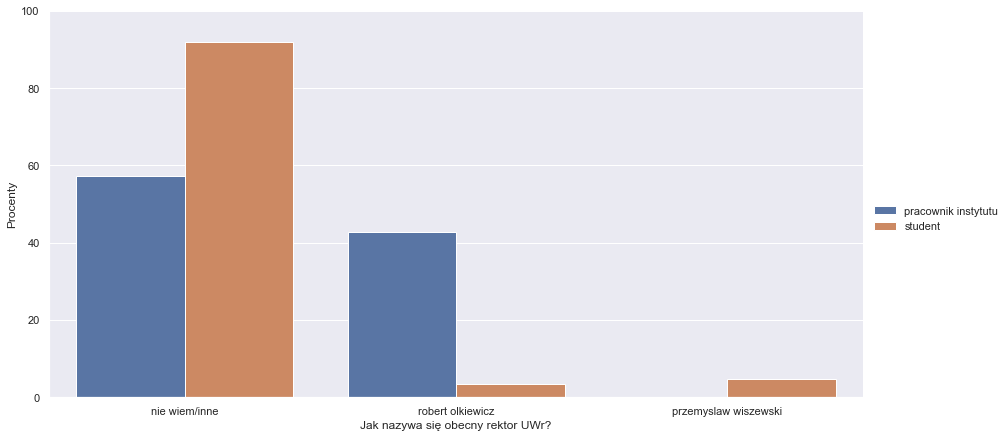

In [91]:
x = 56
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    57          
pracownik instytutu  grunwaldzki     100.000000
student              grunwaldzki      97.674419
                     matematyczny      1.162791
                     wschodni          1.162791
Name: 57, dtype: float64


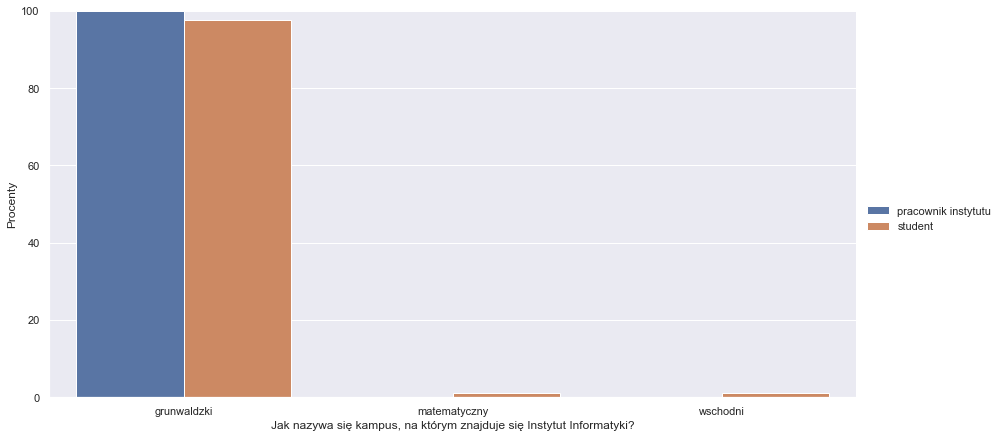

In [92]:
x = 57
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    58
pracownik instytutu  7     85.714286
                     8      7.142857
                     9      7.142857
student              8     45.348837
                     7     31.395349
                     9     17.441860
                     10     5.813953
Name: 58, dtype: float64


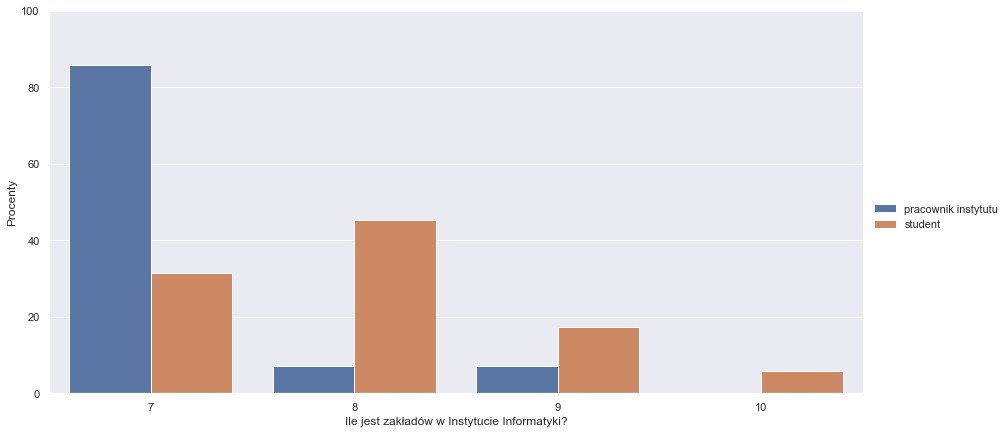

In [93]:
x = 58
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

0                    59                                             
pracownik instytutu  pracownia grafiki komputerowej                     64.285714
                     pracownia metod numerycznych                       14.285714
                     pracownia optymalizacji kombinatorycznej           14.285714
                     pracownia zlozonosci obliczeniowej i algorytmow     7.142857
student              pracownia zlozonosci obliczeniowej i algorytmow    45.348837
                     pracownia grafiki komputerowej                     30.232558
                     pracownia metod numerycznych                       18.604651
                     pracownia optymalizacji kombinatorycznej            5.813953
Name: 59, dtype: float64


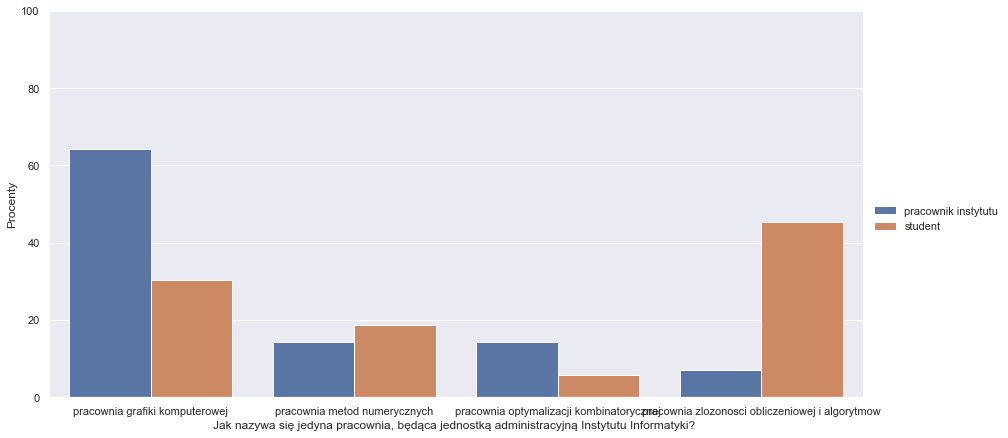

In [94]:
x = 59
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [95]:
keywords = ['whitebook', 'white book', 'weißbuch', 'biala ksiazka', 'biala ksiazeczka']

for row in df[60]:
    if any(keyword in row for keyword in keywords):
        df[60] = df[60].replace(row, 'whitebook')
        df_plot[60] = df_plot[60].replace(row, 'whitebook')
    else:
        df_plot[60] = df_plot[60].replace(row, 'nie wiem/inne')
        
df[60].value_counts()

whitebook    83
nie wiem     11
lajtbuk       2
skrypt        2
lajt buk      1
biblia        1
Name: 60, dtype: int64

0                    60           
pracownik instytutu  whitebook        64.285714
                     nie wiem/inne    35.714286
student              whitebook        86.046512
                     nie wiem/inne    13.953488
Name: 60, dtype: float64


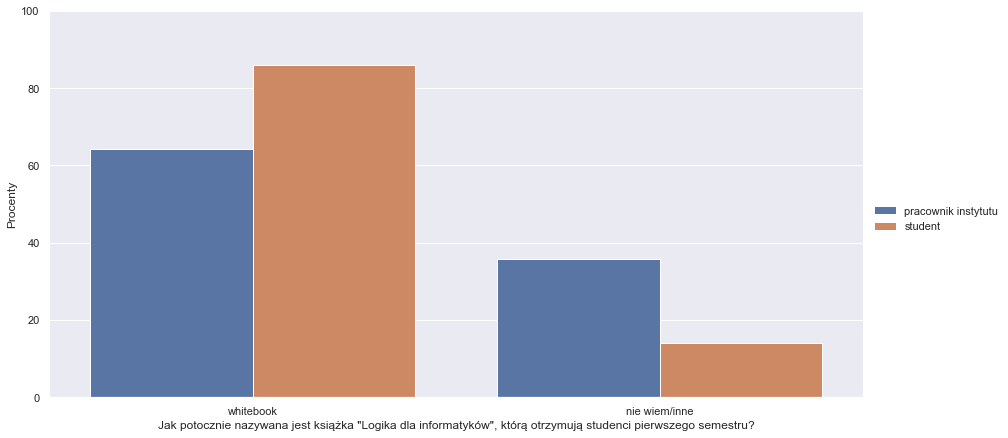

In [96]:
x = 60
y = 0

print(df_plot.groupby(y)[x].value_counts(normalize=True).mul(100))

((df_plot.groupby(y)[x].value_counts(normalize=True).mul(100).rename('Procenty').reset_index()
.pipe((sns.catplot,'data'), x=x, y='Procenty', hue=y, kind='bar', height=6, aspect=2))
.set_axis_labels(numbers_to_questions[x])).set(ylim=(0, 100)) 

In [97]:
for col in df.columns:
    print(df[col].value_counts())

student                86
pracownik instytutu    14
Name: 0, dtype: int64
7+     27
3-4    22
1-2    22
5-6    15
Name: 1, dtype: int64
joliot-curie 15                       34
joliot-curie                          28
nie wiem                              27
pierra curie 3                         1
tego starego komucha 15                1
curie                                  1
wstretnego komucha juliot-curie 15     1
jolint curie 15                        1
curie 15                               1
curie sklodowskiej                     1
joilot curie 15                        1
juliot-curie ???                       1
joulie curie                           1
jliot curie 25                         1
Name: 2, dtype: int64
lukasz piwowar       80
wiktor zychla         9
jakub kowalski        7
marcin mlotkowski     4
Name: 3, dtype: int64
wyspa slodowa                                                          88
nie wiem                                                                5
sp

# Obliczenia

In [98]:
dane = df_plot.copy()

In [99]:
dane.drop(1, inplace=True, axis=1)

In [101]:
pytania_student = [3, 4, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 27, 28, 29, 30,
                   31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 57, 60]

pytania_pracownik = [2, 5, 7, 14, 19, 24, 25, 26, 34, 44, 52, 53, 54, 55, 56, 58, 59]

pytania_usuniete = []

In [106]:
for pytanie in pytania_student:
    print(pytanie, ":", numbers_to_questions[pytanie])

3 : Kto prowadzi przedmiot, na którym nauczysz się tworzyć modele w SketchUpie?
4 : Jakie jest najpopularniejsze miejsce we Wrocławiu, gdzie możesz legalnie napić się piwa na świeżym powietrzu?
6 : Jaka jest pełna nazwa skrótowca ISIM?
8 : Ile przedmiotów obowiązkowych jest na I stopniu studiów (licencjat/inżynier)?
9 : Jakim jednym przedmiotem można zaliczyć efekty kształcenia SO (systemy operacyjne) i ASK (architektura systemów komputerowych)?
10 : Jak nazywa się coroczny, zimowy obóz organizowany przez studentów Instytutu Informatyki?
11 : Gdy student zadeklaruje zadanie, którego nie zrobił, to może dostać za nie dużego…
12 : W jakiej zakładce w USOS sprawdzisz swoje oceny końcowe z przedmiotów?
13 : Wymień 2 przedmioty, które można zdawać na 2 poziomach (licencjackim i magisterskim)? 
15 : Ile wynosi kaucja za kluczyk do szafki?
16 : Ile wynosi kaucja za pilota do parkingu?
17 : Który przedmiot jest uważany za najtrudniejszy do zdania na I stopniu studiów i dużo studentów go powtar

In [107]:
for pytanie in pytania_pracownik:
    print(pytanie, ":", numbers_to_questions[pytanie])

2 : Jaki adres ma Instytut Informatyki (nazwa ulicy i numer)?
5 : Kto jest najwyżej w hierarchii władzy uczelnianej?
7 : Na co dzieli się administracyjnie Instytut Informatyki?
14 : Jaki inny instytut UWr spoza naszego wydziału ma również zajęcia w budynku naszego instytutu?
19 : Jak nazywa się ulica od strony parkingu ze szlabanem przy Instytucie Informatyki?
24 : Kto jest dyrektorem Instytutu Informatyki?
25 : Ilu zastępców ma dyrektor Instytutu Informatyki?
26 : Jak nazywa się restauracja w budynku Instytutu Informatyki?
34 : Jak nazywa się wydział, do którego należy Instytut Informatyki?
44 : Jak nazywa się ministerstwo, pod które podlega UWr?
52 : Ile kondygnacji ma Instytut Informatyki?
53 : Jak nazywa się dziekan naszego wydziału?
54 : Jak nazywa się zastępca dziekana (nazwa stanowiska)?
55 : W jakich latach budowano Instytut Informatyki?
56 : Jak nazywa się obecny rektor UWr?
58 : Ile jest zakładów w Instytucie Informatyki?
59 : Jak nazywa się jedyna pracownia, będąca jednostką

In [125]:
for col in dane.columns:
    for row in dane[col]:
        if row == 'nie wiem/inne':
            dane[col] = dane[col].replace(row, 0)

dane[0] = dane[0].replace('student', 1)
dane[0] = dane[0].replace('pracownik instytutu', 0)

dane[2] = dane[2].replace('joliot-curie 15', 1)
dane[2] = dane[2].replace('joliot-curie', 0)

dane[3] = dane[3].replace('lukasz piwowar', 1)
dane[3] = dane[3].replace('wiktor zychla', 0)
dane[3] = dane[3].replace('jakub kowalski', 0)
dane[3] = dane[3].replace('marcin mlotkowski', 0)

dane[4] = dane[4].replace('wyspa slodowa', 1)

dane[5] = dane[5].replace('rektor', 1)
dane[5] = dane[5].replace('dziekan', 0)
dane[5] = dane[5].replace('dyrektor', 0)
dane[5] = dane[5].replace('prodziekan', 0)

dane[6] = dane[6].replace('indywidualne studia informatyczno-matematyczne', 1)
dane[6] = dane[6].replace('indywidualne studia inf-mat', 0)

dane[7] = dane[7].replace('zaklady', 1)
dane[7] = dane[7].replace('wydzialy', 0)
dane[7] = dane[7].replace('katedry', 0)
dane[7] = dane[7].replace('zespoly', 0)

dane[8] = dane[8].replace(7, 1)
dane[8] = dane[8].replace(6, 0)
dane[8] = dane[8].replace(8, 0)
dane[8] = dane[8].replace(9, 0)

dane[9] = dane[9].replace('syk (systemy komputerowe)', 1)

dane[10] = dane[10].replace('zosia (zimowy oboz studentow informatyki a)', 1)

dane[11] = dane[11].replace('grzyba', 1)

dane[12] = dane[12].replace('oceny koncowe', 1)
dane[12] = dane[12].replace('zaliczenia etapow', 0)
dane[12] = dane[12].replace('sprawdziany', 0)
dane[12] = dane[12].replace('semestry', 0)

dane[13] = dane[13].replace('an, md', 1)
dane[13] = dane[13].replace('aisd, md', 1)
dane[13] = dane[13].replace('aisd, an', 1)

dane[14] = dane[14].replace('dziennikarstwa', 1)

dane[15] = dane[15].replace(20, 1)
dane[15] = dane[15].replace(50, 0)
dane[15] = dane[15].replace(10, 0)
dane[15] = dane[15].replace(30, 0)

dane[16] = dane[16].replace(100, 1)
dane[16] = dane[16].replace(50, 0)
dane[16] = dane[16].replace(200, 0)
dane[16] = dane[16].replace(20, 0)

dane[17] = dane[17].replace('aisd', 1)

dane[18] = dane[18].replace(4, 1)
dane[18] = dane[18].replace(5, 0)
dane[18] = dane[18].replace(3, 0)
dane[18] = dane[18].replace(6, 0)

dane[19] = dane[19].replace('benedykta polaka', 1)

dane[20] = dane[20].replace('bravo', 1)

dane[21] = dane[21].replace('kolo studentow informatyki', 1)

dane[22] = dane[22].replace(35, 1)
dane[22] = dane[22].replace(30, 0)
dane[22] = dane[22].replace(40, 0)
dane[22] = dane[22].replace(45, 0)

dane[23] = dane[23].replace(45, 1)
dane[23] = dane[23].replace(60, 0)
dane[23] = dane[23].replace(50, 0)
dane[23] = dane[23].replace(40, 0)

dane[24] = dane[24].replace('jerzy marcinkowski', 1)

dane[25] = dane[25].replace(2, 0)
dane[25] = dane[25].replace(1, 0)
dane[25] = dane[25].replace(4, 1)
dane[25] = dane[25].replace(3, 0)

dane[26] = dane[26].replace('plastyczna', 1)

dane[27] = dane[27].replace(24, 1)
dane[27] = dane[27].replace(48, 0)
dane[27] = dane[27].replace(12, 0)
dane[27] = dane[27].replace(36, 0)

dane[28] = dane[28].replace(3, 1)
dane[28] = dane[28].replace(5, 0)
dane[28] = dane[28].replace(10, 0)
dane[28] = dane[28].replace(1, 0)

dane[29] = dane[29].replace('lukasz piwowar', 1)
dane[29] = dane[29].replace('wiktor zychla', 0)
dane[29] = dane[29].replace('jakub kowalski', 0)
dane[29] = dane[29].replace('marcin mlotkowski', 0)

dane[30] = dane[30].replace('osoba ukryla swoje dane osobowe', 1)
dane[30] = dane[30].replace('osoba jest z erasmusa', 0)
dane[30] = dane[30].replace('osoba jest doktorantem', 0)
dane[30] = dane[30].replace('osoba już nie studiuje', 0)

dane[31] = dane[31].replace(24, 1)
dane[31] = dane[31].replace(12, 0)
dane[31] = dane[31].replace(72, 0)
dane[31] = dane[31].replace(48, 0)

dane[32] = dane[32].replace('sprawdziany', 1)
dane[32] = dane[32].replace('listy zadan', 0)
dane[32] = dane[32].replace('zaliczenia etapow', 0)
dane[32] = dane[32].replace('oceny koncowe', 0)

dane[33] = dane[33].replace('do kolejki', 1)
dane[33] = dane[33].replace('do listy oczekujacych', 0)
dane[33] = dane[33].replace('do listy rezerwowej', 0)
dane[33] = dane[33].replace('nie jest to mozliwe', 0)

dane[34] = dane[34].replace('wydzial matematyki i informatyki', 1)
dane[34] = dane[34].replace('wydzial informatyki i matematyki', 0)

dane[35] = dane[35].replace(6, 1)
dane[35] = dane[35].replace(5, 0)
dane[35] = dane[35].replace(7, 0)
dane[35] = dane[35].replace(8, 0)

dane[36] = dane[36].replace('sieci komputerowe', 1)
dane[36] = dane[36].replace('systemy komputerowe', 0)

dane[37] = dane[37].replace('projektowanie obiektowe oprogramowania', 1)
dane[37] = dane[37].replace('programowanie obiektowe oprogramowania', 0)
dane[37] = dane[37].replace('projektowanie oprogramowania obiektowego', 0)

dane[38] = dane[38].replace('komunikacja czlowiek-komputer', 1)

dane[39] = dane[39].replace('rachunek prawdopodobienstwa i statystyka', 1)

dane[40] = dane[40].replace('zdzislaw ploski', 1)
dane[40] = dane[40].replace('pawel laskos-grabowski', 0)
dane[40] = dane[40].replace('bartosz bednarczyk', 0)
dane[40] = dane[40].replace('rafal nowak', 0)

dane[41] = dane[41].replace('moje konto', 1)
dane[41] = dane[41].replace('zaliczenia', 0)
dane[41] = dane[41].replace('moj profil', 0)
dane[41] = dane[41].replace('wyniki', 0)

dane[42] = dane[42].replace('testowanie gier', 1)
dane[42] = dane[42].replace('sztuczna inteligencja', 0)
dane[42] = dane[42].replace('ai4games', 0)
dane[42] = dane[42].replace('unity', 0)

dane[43] = dane[43].replace('most grunwaldzki', 1)

dane[44] = dane[44].replace('ministerstwo edukacji', 0)
dane[44] = dane[44].replace('ministerstwo edukacji i nauki', 0)
dane[44] = dane[44].replace('ministerstwo szkolnictwa wyzszego', 0)
dane[44] = dane[44].replace('ministerstwo nauki i szkolnictwa wyzszego', 1)
dane[44] = dane[44].replace('ministerstwo edukacji i szkolnictwa wyzszego', 0)

dane[45] = dane[45].replace('piatek', 1)
dane[45] = dane[45].replace('jest otwarty od poniedzialku do piatku', 0)
dane[45] = dane[45].replace('sroda', 0)
dane[45] = dane[45].replace('poniedzialek', 0)

dane[46] = dane[46].replace('golebnik', 1)
dane[46] = dane[46].replace('szafka', 0)
dane[46] = dane[46].replace('polka', 0)

dane[47] = dane[47].replace('zielony', 1)
dane[47] = dane[47].replace('niebieski', 0)
dane[47] = dane[47].replace('szary', 0)
dane[47] = dane[47].replace('bialy', 0)

dane[48] = dane[48].replace(2, 1)
dane[48] = dane[48].replace(3, 0)
dane[48] = dane[48].replace(4, 0)
dane[48] = dane[48].replace(5, 0)

dane[49] = dane[49].replace('system komunikacji na odleglosc ze studentami', 1)
dane[49] = dane[49].replace('system komunikacji...', 0)
dane[49] = dane[49].replace('system ksztalcenia...', 0)

dane[50] = dane[50].replace('metody programowania', 1)

dane[51] = dane[51].replace('alpaki', 1)
dane[51] = dane[51].replace('psy', 0)
dane[51] = dane[51].replace('koty', 0)
dane[51] = dane[51].replace('kozy', 0)

dane[52] = dane[52].replace(4, 1)
dane[52] = dane[52].replace(3, 0)
dane[52] = dane[52].replace(2, 0)
dane[52] = dane[52].replace(5, 1)

dane[53] = dane[53].replace('tomasz jurdzinski', 1)

dane[54] = dane[54].replace('prodziekan', 1)

dane[55] = dane[55].replace('2004-2006', 1)
dane[55] = dane[55].replace('2008-2010', 0)
dane[55] = dane[55].replace('2000-2002', 0)
dane[55] = dane[55].replace('2012-2014', 0)

dane[56] = dane[56].replace('robert olkiewicz', 1)
dane[56] = dane[56].replace('przemyslaw wiszewski', 0)

dane[57] = dane[57].replace('grunwaldzki', 1)
dane[57] = dane[57].replace('matematyczny', 0)
dane[57] = dane[57].replace('wschodni', 0)
dane[57] = dane[57].replace('przy odrze', 0)

dane[58] = dane[58].replace(7, 1)
dane[58] = dane[58].replace(8, 0)
dane[58] = dane[58].replace(9, 0)
dane[58] = dane[58].replace(10, 0)

dane[59] = dane[59].replace('pracownia grafiki komputerowej', 1)
dane[59] = dane[59].replace('pracownia zlozonosci obliczeniowej i algorytmow', 0)
dane[59] = dane[59].replace('pracownia metod numerycznych', 0)
dane[59] = dane[59].replace('pracownia optymalizacji kombinatorycznej', 0)

dane[60] = dane[60].replace('whitebook', 1)

In [126]:
suma_student = [0] * len(dane.index)
dane[61] = suma_student

In [127]:
suma_pracownik = [0] * len(dane.index)
dane[62] = suma_pracownik

In [128]:
for index, row in dane.iterrows():
    suma_student = 0
    suma_pracownik = 0
    for pytanie in pytania_student:
        suma_student += row[pytanie]
    for pytanie in pytania_pracownik:
        suma_pracownik += row[pytanie]
    row[61] = suma_student
    row[62] = suma_pracownik

In [129]:
dane

,0,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
0,1,0,1,0,1,1,0,1,1,1,...,1,0,0,0,1,0,1,1,33,8
1,1,0,1,0,1,1,1,0,0,1,...,0,0,1,0,1,0,1,1,30,8
2,1,0,1,0,1,0,1,1,0,1,...,0,1,0,0,1,0,0,1,31,6
3,1,0,1,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,38,10
4,1,0,1,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,38,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,25,4
96,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,34,2
97,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,33,5
98,1,0,0,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,28,7


[Text(0.5, 0, 'suma studenckich pkt'), Text(0, 0.5, 'suma pracowniczych pkt')]

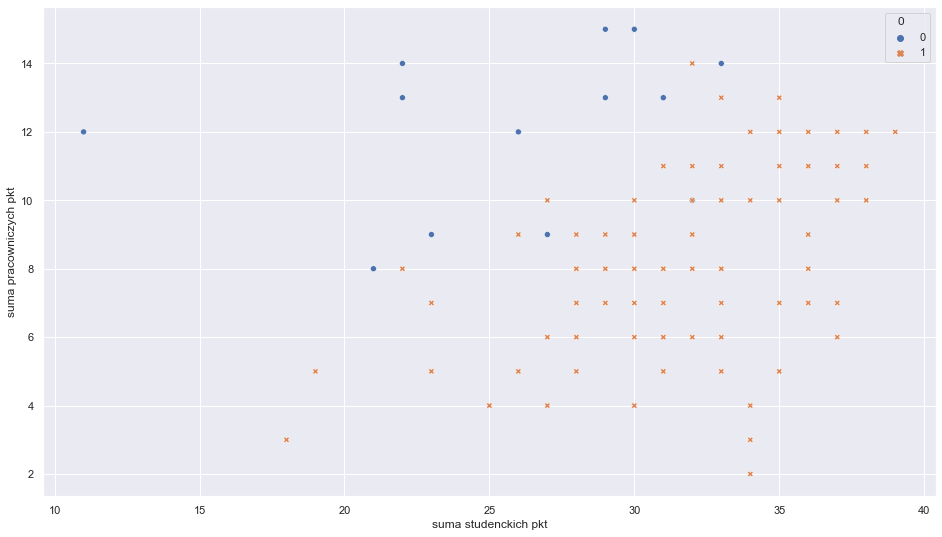

In [130]:
sns.set(rc={'figure.figsize':(16,9)})
(sns.scatterplot(x=61, y=62, hue=0, data=dane, style=0)
.set(xlabel='suma studenckich pkt', ylabel='suma pracowniczych pkt'))

# Statystyki pracowników

In [119]:
pracownicy = df.loc[df[0] == 'pracownik instytutu']

pracownicy

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
9,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,wyspa slodowa,rektor,interdyscyplinarne studia informatyczno-matema...,zaklady,7,syk (systemy komputerowe),...,alpaki,4,tomasz jurdzinski,nie wiem,2004-2006,nie wiem,grunwaldzki,7,pracownia grafiki komputerowej,whitebook
10,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,wyspa slodowa,rektor,indywidualne studia informatyczno-matematyczne,zaklady,7,syk (systemy komputerowe),...,alpaki,3,tomasz jurdzinski,nie wiem,2008-2010,nie wiem,grunwaldzki,8,pracownia optymalizacji kombinatorycznej,lajtbuk
11,pracownik instytutu,NaN,nie wiem,lukasz piwowar,wyspa slodowa,rektor,indywidualne studia informatyczno-matematyczne,zaklady,8,syk (systemy komputerowe),...,alpaki,4,tomasz jurdzinski,prodziekan,2000-2002,robert olkiewicz,grunwaldzki,9,pracownia optymalizacji kombinatorycznej,whitebook
12,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,nie wiem,rektor,indywidualne studia informatyczno-matematyczne,zaklady,9,nie wiem,...,alpaki,5,tomasz jurdzinski,prodziekan,2004-2006,robert olkiewicz,grunwaldzki,7,pracownia grafiki komputerowej,nie wiem
13,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,nie wiem,rektor,interdyscyplinarne studia informatyczno-matema...,zaklady,6,nie wiem,...,alpaki,3,tomasz jurdzinski,zastepca dziekana ds. studenckich,2004-2006,nie wiem,grunwaldzki,7,pracownia metod numerycznych,whitebook
14,pracownik instytutu,NaN,nie wiem,marcin mlotkowski,wyspa slodowa,rektor,indywidualne studia costam costam,zaklady,6,nie wiem,...,alpaki,4,tomasz jurdzinski,prodziekan,2004-2006,nie wiem,grunwaldzki,7,pracownia grafiki komputerowej,nie wiem
15,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,wyspa slodowa,rektor,indywidualne studia informatyczno-matematyczne,zaklady,6,nie wiem,...,alpaki,4,tomasz jurdzinski,prodziekan,2004-2006,robert olkiewicz,grunwaldzki,7,pracownia grafiki komputerowej,whitebook
16,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,wyspa slodowa,rektor,indywidualne studia informatyczno-matematyczne,zaklady,7,syk (systemy komputerowe),...,alpaki,3,tomasz jurdzinski,prodziekan,2004-2006,robert olkiewicz,grunwaldzki,7,pracownia grafiki komputerowej,whitebook
17,pracownik instytutu,NaN,joliot-curie 15,lukasz piwowar,"w poblizu wyspy piasek, ale nazwa tego obszaru...",rektor,indywidualne studia informatyczno-matematyczne,zaklady,6,syk (systemy komputerowe),...,alpaki,4,tomasz jurdzinski,prodziekan,2004-2006,nie wiem,grunwaldzki,7,pracownia grafiki komputerowej,whitebook
18,pracownik instytutu,NaN,joliot-curie 15,jakub kowalski,wyspa slodowa,rektor,indywidualne studia inf-mat,zaklady,7,syk (systemy komputerowe),...,alpaki,5,tomasz jurdzinski,prodziekan,2004-2006,robert olkiewicz,grunwaldzki,7,pracownia grafiki komputerowej,nie wiem


In [120]:
for col in pracownicy.columns:
    print(pracownicy[col].value_counts())

pracownik instytutu    14
Name: 0, dtype: int64
Series([], Name: 1, dtype: int64)
joliot-curie 15    9
nie wiem           3
joliot-curie       2
Name: 2, dtype: int64
lukasz piwowar       11
marcin mlotkowski     2
jakub kowalski        1
Name: 3, dtype: int64
wyspa slodowa                                                          8
nie wiem                                                               3
rynek                                                                  1
nad odra                                                               1
w poblizu wyspy piasek, ale nazwa tego obszaru wyleciala mi z glowy    1
Name: 4, dtype: int64
rektor     13
dziekan     1
Name: 5, dtype: int64
indywidualne studia informatyczno-matematyczne          9
interdyscyplinarne studia informatyczno-matematyczne    2
indywidualne studia inf-mat                             1
indywidualne studia costam costam                       1
nie wiem                                                1
Name: 6, dty

In [123]:
for col in pracownicy.columns:
    print(pracownicy[col].value_counts())

pracownik instytutu    14
Name: 0, dtype: int64
Series([], Name: 1, dtype: int64)
joliot-curie 15    9
nie wiem           3
joliot-curie       2
Name: 2, dtype: int64
lukasz piwowar       11
marcin mlotkowski     2
jakub kowalski        1
Name: 3, dtype: int64
wyspa slodowa                                                          8
nie wiem                                                               3
rynek                                                                  1
nad odra                                                               1
w poblizu wyspy piasek, ale nazwa tego obszaru wyleciala mi z glowy    1
Name: 4, dtype: int64
rektor     13
dziekan     1
Name: 5, dtype: int64
indywidualne studia informatyczno-matematyczne          9
interdyscyplinarne studia informatyczno-matematyczne    2
indywidualne studia inf-mat                             1
indywidualne studia costam costam                       1
nie wiem                                                1
Name: 6, dty

# Statystyki studentów

In [117]:
studenci = df.loc[df[0] == 'student']

#studenci

In [118]:
for col in studenci.columns:
    print(studenci[col].value_counts())

student    86
Name: 0, dtype: int64
7+     27
1-2    22
3-4    22
5-6    15
Name: 1, dtype: int64
joliot-curie                          26
joliot-curie 15                       25
nie wiem                              24
pierra curie 3                         1
tego starego komucha 15                1
curie                                  1
wstretnego komucha juliot-curie 15     1
jolint curie 15                        1
curie 15                               1
curie sklodowskiej                     1
joilot curie 15                        1
juliot-curie ???                       1
joulie curie                           1
jliot curie 25                         1
Name: 2, dtype: int64
lukasz piwowar       69
wiktor zychla         9
jakub kowalski        6
marcin mlotkowski     2
Name: 3, dtype: int64
wyspa slodowa               80
nie wiem                     2
beachbar na bulwarze pwr     1
spiz                         1
orzed instytut               1
bulwar pwr                   1
Na